### Student Information
Name: 許昱呈

Student ID: 111164519

GitHub ID: a19990702

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

# Part 1

In [1]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)
print("\n".join(twenty_train.data[0].split("\n")))


From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



### ** >>> Exercise 1 (5 min): **  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [2]:
#1
print(twenty_train.data[0:3])
#2
for i in range(3):
    print( "\ntranslater:\n")
    print("\n".join(twenty_train.data[i].split("\n")))

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n', "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the proble

## 3. Data Transformation
So we want to explore and understand our data a little bit better. Before we do that we definitely need to apply some transformations just so we can have our dataset in a nice format to be able to explore it freely and more efficient. Lucky for us, there are powerful scientific tools to transform our data into that tabular format we are so farmiliar with. So that is what we will do in the next section--transform our data into a nice table format.

In [3]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### 3.2 Familiarizing yourself with the Data

In [4]:
# using loc (by label)
X.loc[:10, 'text']

0     From: sd345@city.ac.uk (Michael Collier) Subje...
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4     From: stanly@grok11.columbiasc.ncr.com (stanly...
5     From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6     From: jodfishe@silver.ucs.indiana.edu (joseph ...
7     From: aldridge@netcom.com (Jacquelin Aldridge)...
8     From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9     From: libman@hsc.usc.edu (Marlena Libman) Subj...
10    From: anasaz!karl@anasazi.com (Karl Dussik) Su...
Name: text, dtype: object

In [5]:
# using iloc (by position)
X.iloc[:10, 0]

0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3    From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4    From: stanly@grok11.columbiasc.ncr.com (stanly...
5    From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6    From: jodfishe@silver.ucs.indiana.edu (joseph ...
7    From: aldridge@netcom.com (Jacquelin Aldridge)...
8    From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9    From: libman@hsc.usc.edu (Marlena Libman) Subj...
Name: text, dtype: object

In [6]:
#the different in loc and iloc

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [7]:
arrays = [
    ["a", "b", "c", "d", "e", "f", "g", "h"],
    ["0", "1", "2", "3", "4", "5", "6", "7"],
]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples)

print( index )
arrays = [["a", "b", "c", "d"], ["0", "1"]]
product = pd.MultiIndex.from_product(arrays)
print( product )

sort_list = X.sort_values( by=['text'])
print(sort_list)

MultiIndex([('a', '0'),
            ('b', '1'),
            ('c', '2'),
            ('d', '3'),
            ('e', '4'),
            ('f', '5'),
            ('g', '6'),
            ('h', '7')],
           )
MultiIndex([('a', '0'),
            ('a', '1'),
            ('b', '0'),
            ('b', '1'),
            ('c', '0'),
            ('c', '1'),
            ('d', '0'),
            ('d', '1')],
           )
                                                   text  category  \
1598   cs.utexas.edu!geraldo.cc.utexas.edu!portal.au...         0   
1595   cs.utexas.edu!geraldo.cc.utexas.edu!portal.au...         0   
1144   cs.utexas.edu!uunet!olivea!sgigate!sgiblab!ad...         0   
1151   cs.utexas.edu!uunet!olivea!sgigate!sgiblab!ad...         0   
1506   howland.reston.ans.net!europa.eng.gtefsd.com!...         0   
...                                                 ...       ...   
1817  Subject: XV under MS-DOS ?!? From: NO E-MAIL A...         1   
766   Subject: [ANNOUNCE] Ivan Suthe

### ** >>> Exercise 3 (5 min): **  
Try to fetch records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [8]:
X[X['category_name']=='sci.med'].iloc[::10][0:5]

text  category category_name
7    From: aldridge@netcom.com (Jacquelin Aldridge)...         2       sci.med
49   From: jimj@contractor.EBay.Sun.COM (Jim Jones)...         2       sci.med
82   From: jason@ab20.larc.nasa.gov (Jason Austin) ...         2       sci.med
118  From: rogers@calamari.hi.com (Andrew Rogers) S...         2       sci.med
142  From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...         2       sci.med

## 4. Data Mining using Pandas

Let's do some serious work now. Let's learn to program some of the ideas and concepts learned so far in the data mining course. This is the only way we can be convince ourselves of the true power of Pandas dataframes. 

### 4.1 Missing Values

### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [9]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1 ) 

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [10]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [11]:
NA_df['missing_example'].isnull()
NA_df.isnull().apply(lambda x: dmh.check_missing_values(x))
#they have 3 missing data can't be detected

id                     missing_example
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   3

In [12]:
#The strings 'NaN' and 'None' are indistinguishable on display, but are not considered as missing values. 
#The empty string '' is also not treated as a missing value.
NA_db = NA_df.replace(['NaN', 'None', ''], float('nan'))
NA_db
NA_db['missing_example'].isnull()
NA_db.isnull().apply(lambda x: dmh.check_missing_values(x))
print( NA_db.isnull().apply(lambda x: dmh.check_missing_values(x)) )
NA_db.dropna(inplace=True)


                                   id                     missing_example
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   6


### 4.2 Dealing with Duplicate Data
Dealing with duplicate data is just as painful as dealing with missing data. The worst case is that you have duplicate data that has missing values. But let us not get carried away. Let us stick with the basics. As we have learned in our Data Mining course, duplicate data can occur because of many reasons. The majority of the times it has to do with how we store data or how we collect and merge data. For instance, we may have collected and stored a tweet, and a retweet of that same tweet as two different records; this results in a case of data duplication; the only difference being that one is the original tweet and the other the retweeted one. Here you will learn that dealing with duplicate data is not as challenging as missing values. But this also all depends on what you consider as duplicate data, i.e., this all depends on your criteria for what is considered as a duplicate record and also what type of data you are dealing with. For textual data, it may not be so trivial as it is for numerical values or images. Anyhow, let us look at some code on how to deal with duplicate records in our `X` dataframe.

In [13]:
#add the duplicate data and try to delete them
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]
X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)

In [14]:
sum(X.duplicated('text'))

1

In [15]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe
sum(X.duplicated('text'))

0

## 5.  Data Preprocessing
In the Data Mining course we learned about the many ways of performing data preprocessing. In reality, the list is quiet general as the specifics of what data preprocessing involves is too much to cover in one course. This is especially true when you are dealing with unstructured data, as we are dealing with in this particular notebook. But let us look at some examples for each data preprocessing technique that we learned in the class. We will cover each item one by one, and provide example code for each category. You will learn how to perform each of the operations, using Pandas, that cover the essentials to Preprocessing in Data Mining. We are not going to follow any strict order, but the items we will cover in the preprocessing section of this notebook are as follows:

- Aggregation
- Sampling
- Dimensionality Reduction
- Feature Subset Selection
- Feature Creation
- Discretization and Binarization
- Attribute Transformation

### 5.1 Sampling
The first concept that we are going to cover from the above list is sampling. Sampling refers to the technique used for selecting data. The functionalities that we use to  selected data through queries provided by Pandas are actually basic methods for sampling. The reasons for sampling are sometimes due to the size of data -- we want a smaller subset of the data that is still representatitive enough as compared to the original dataset. 

We don't have a problem of size in our current dataset since it is just a couple thousand records long. But if we pay attention to how much content is included in the `text` field of each of those records, you will realize that sampling may not be a bad idea after all. In fact, we have already done some sampling by just reducing the records we are using here in this notebook; remember that we are only using four categories from the all the 20 categories available. Let us get an idea on how to sample using pandas operations.

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

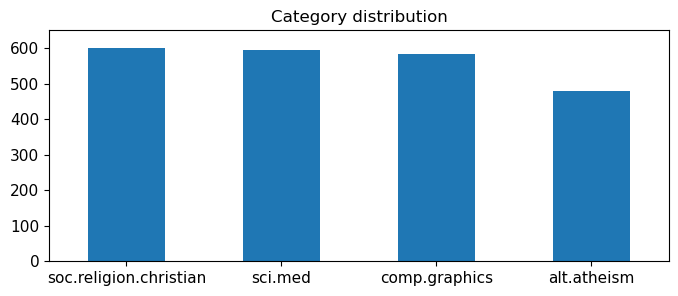

In [17]:
print(X.category_name.value_counts())

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 650],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

soc.religion.christian    263
sci.med                   255
comp.graphics             254
alt.atheism               228
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

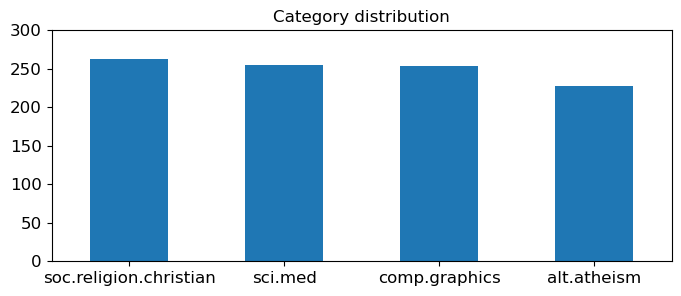

In [18]:
X_sample = X.sample(n=1000)
print(X_sample.category_name.value_counts())
# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

<AxesSubplot:title={'center':'Category distribution'}>

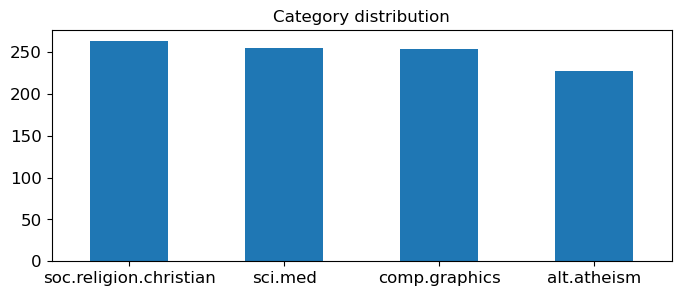

In [19]:
#ans1 : don't add ylim value in code   
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',                                            
                                           rot = 0, fontsize = 12, figsize = (8,3))

soc.religion.christian    263
sci.med                   255
comp.graphics             254
alt.atheism               228
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

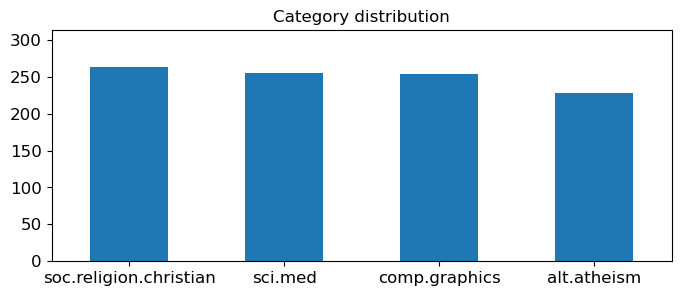

In [20]:
# find the max of y-value in dataset
upper_bound = max(X_sample.category_name.value_counts() +50 ) #276+50
print( X_sample.category_name.value_counts())
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution', 
                                           ylim = [ 0, upper_bound],
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

soc.religion.christian    271
sci.med                   262
comp.graphics             262
alt.atheism               205
Name: category_name, dtype: int64
sci.med                   273
comp.graphics             258
soc.religion.christian    244
alt.atheism               225
Name: category_name, dtype: int64


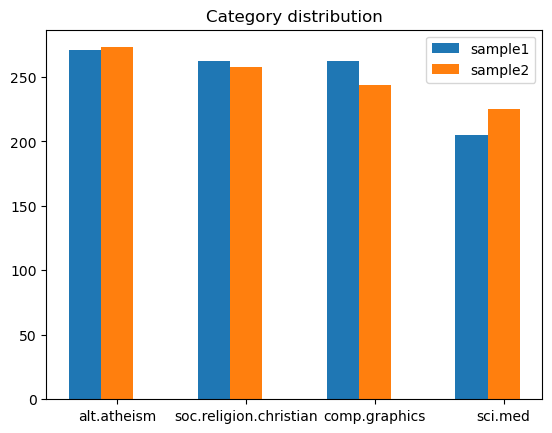

In [21]:
X_sample_1 = X.sample(n=1000) #random state
X_sample_2 = X.sample(n=1000) #random state
x = np.arange(len(categories))
y1 = X_sample_1.category_name.value_counts() 
print( y1 )
y2 = X_sample_2.category_name.value_counts()
print( y2 )
plt.bar(x, y1,  label = 'sample1', width=0.25)
plt.bar(x+0.25, y2,  label = 'sample2', width=0.25)
plt.xticks( x+0.25, categories)
plt.legend()
plt.title('Category distribution')
plt.show()

### 5.2 Feature Creation
The other operation from the list above that we are going to practise on is the so-called feature creation. As the name suggests, in feature creation we are looking at creating new interesting and useful features from the original dataset; a feature which captures the most important information from the raw information we already have access to. In our `X` table, we would like to create some features from the `text` field, but we are still not sure what kind of features we want to create. We can think of an interesting problem we want to solve, or something we want to analyze from the data, or some questions we want to answer. This is one process to come up with features -- this process is usually called `feature engineering` in the data science community. 

We know what feature creation is so let us get real involved with our dataset and make it more interesting by adding some special features or attributes if you will. First, we are going to obtain the **unigrams** for each text. (Unigram is just a fancy word we use in Text Mining which stands for 'tokens' or 'individual words'.) Yes, we want to extract all the words found in each text and append it as a new feature to the pandas dataframe. The reason for extracting unigrams is not so clear yet, but we can start to think of obtaining some statistics about the articles we have: something like **word distribution** or **word frequency**.

Before going into any further coding, we will also introduce a useful text mining library called [NLTK](http://www.nltk.org/). The NLTK library is a natural language processing tool used for text mining tasks, so might as well we start to familiarize ourselves with it from now (It may come in handy for the final project!). In partcular, we are going to use the NLTK library to conduct tokenization because we are interested in splitting a sentence into its individual components, which we refer to as words, emojis, emails, etc. So let us go for it! We can call the `nltk` library as follows:

```python
import nltk
```

In [22]:
import nltk
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

### 5.3 Feature subset selection
Okay, so we are making some headway here. Let us now make things a bit more interesting. We are going to do something different from what we have been doing thus far. We are going use a bit of everything that we have learned so far. Briefly speaking, we are going to move away from our main dataset (one form of feature subset selection), and we are going to generate a document-term matrix from the original dataset. In other words we are going to be creating something like this. 

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")
#tokenization, remove step words(e.g. i, a , creat an nigram)


['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [24]:
tokenized_text = analyze(X[0:1]['text'][0])
print(tokenized_text)

['from', 'sd345', 'city', 'ac', 'uk', 'michael', 'collier', 'subject', 'converting', 'images', 'to', 'hp', 'laserjet', 'iii', 'nntp', 'posting', 'host', 'hampton', 'organization', 'the', 'city', 'university', 'lines', '14', 'does', 'anyone', 'know', 'of', 'good', 'way', 'standard', 'pc', 'application', 'pd', 'utility', 'to', 'convert', 'tif', 'img', 'tga', 'files', 'into', 'laserjet', 'iii', 'format', 'we', 'would', 'also', 'like', 'to', 'do', 'the', 'same', 'converting', 'to', 'hpgl', 'hp', 'plotter', 'files', 'please', 'email', 'any', 'response', 'is', 'this', 'the', 'correct', 'group', 'thanks', 'in', 'advance', 'michael', 'michael', 'collier', 'programmer', 'the', 'computer', 'unit', 'email', 'collier', 'uk', 'ac', 'city', 'the', 'city', 'university', 'tel', '071', '477', '8000', 'x3769', 'london', 'fax', '071', '477', '8565', 'ec1v', '0hb']


In [25]:
# We can check the shape of this matrix by:
X_counts.shape
# there are 2257 data 
# in this dataset has 35788 different token


(2257, 35788)

In [26]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '0000', '0000001200', '000005102000', '0001',
       '000100255pixel', '00014', '000406', '0007'], dtype=object)

In [27]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [28]:
#count_vect.get_feature_names_out() contain all of the token in dataset
#in this dataset has 35788 different tokenans = 0
array = X_counts[0:5, 0:100].toarray()
for i in range(100):
    if array[4][i] == [1]:
        ans = i
print(ans)
print(count_vect.get_feature_names_out()[ans])


#ans: "01"

37
01


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

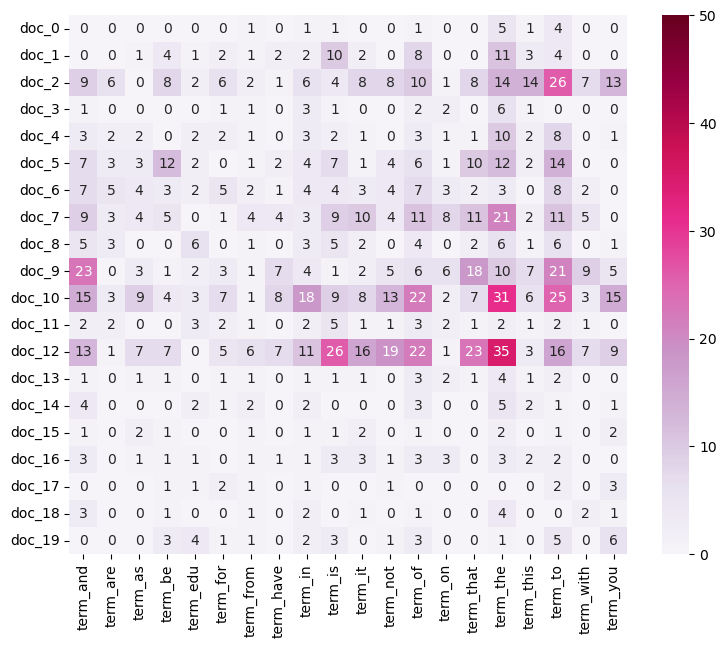

In [29]:
import seaborn as sns
# first twenty features only
count_vect1 = CountVectorizer(max_features=20) #find top 20 of high frequecy token in data
X_max20 = count_vect1.fit_transform(X.text) #learn the vocabulary and return document-term matrix

plot_x = ["term_"+str(i) for i in count_vect1.get_feature_names_out()[0:20]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_max20[:20,0:20].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=50,annot=True)

### 5.4 Dimensionality Reduction
Since we have just touched on the concept of sparsity most naturally the problem of "curse of dimentionality" comes up. I am not going to get into the full details of what dimensionality reduction is and what it is good for just the fact that is an excellent technique for visualizing data efficiently (please refer to notes for more information). All I can say is that we are going to deal with the issue of sparsity with a few lines of code. And we are going to try to visualize our data more efficiently with the results.

We are going to make use of Principal Component Analysis to efficiently reduce the dimensions of our data, with the main goal of "finding a projection that captures the largest amount of variation in the data." This concept is important as it is very useful for visualizing and observing the characteristics of our dataset. 

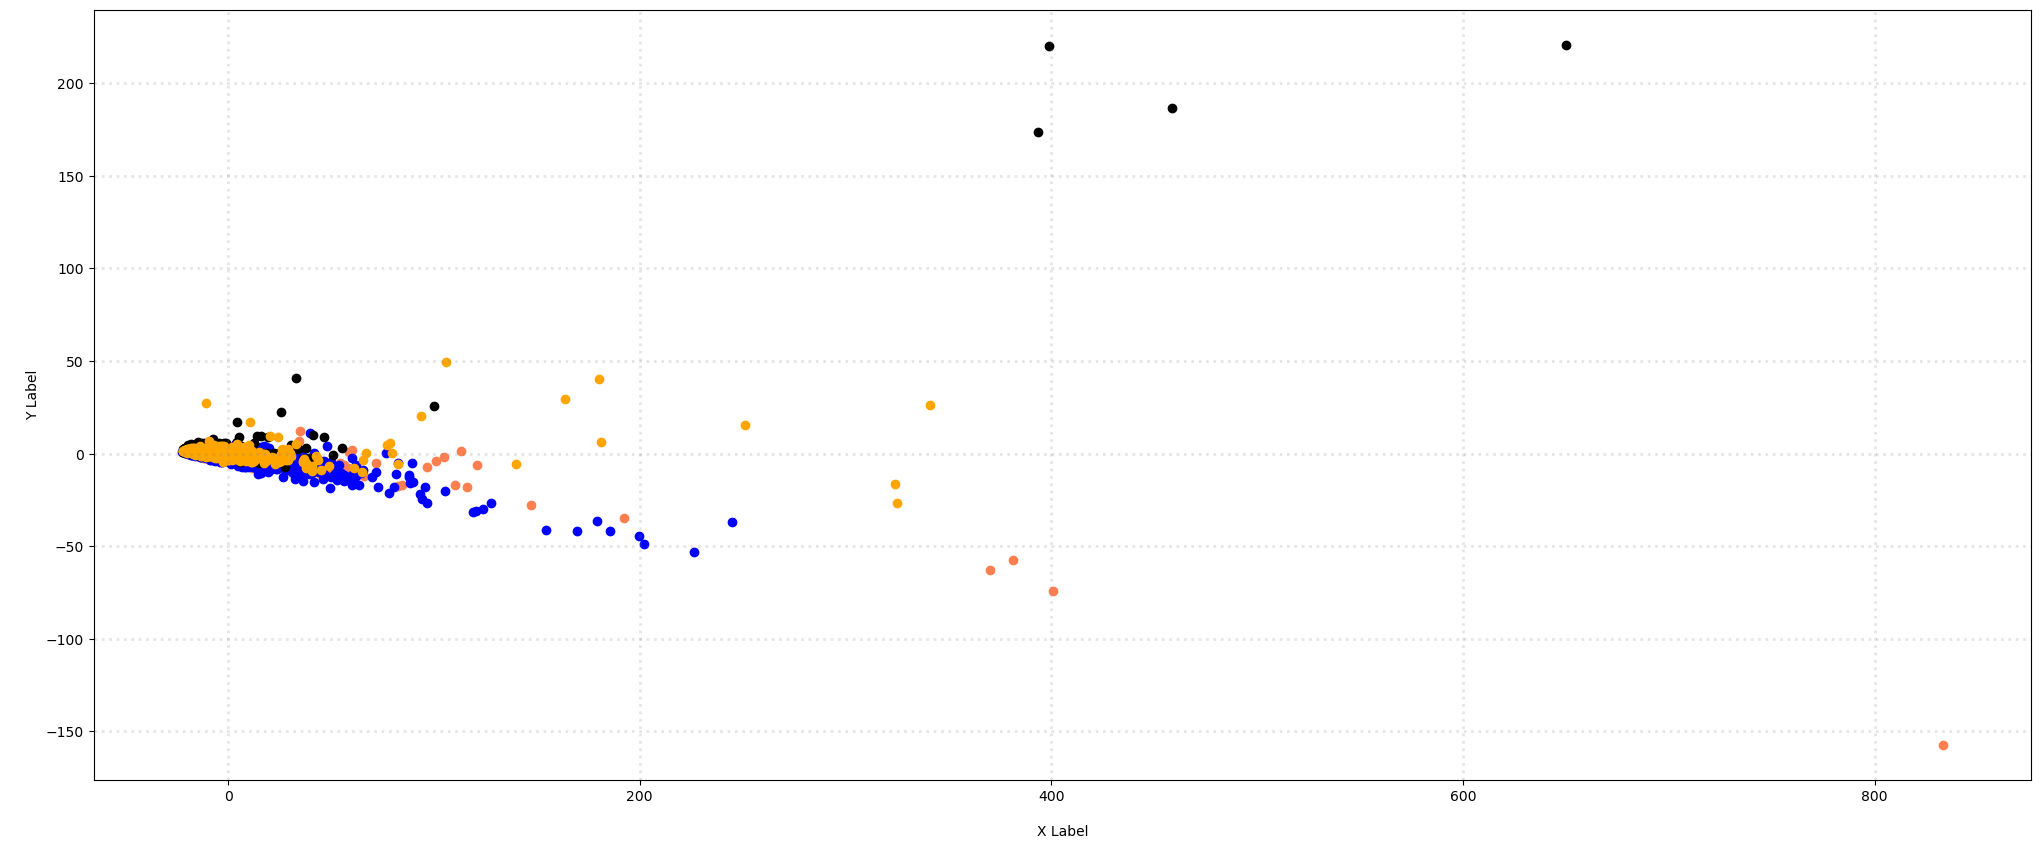

In [30]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

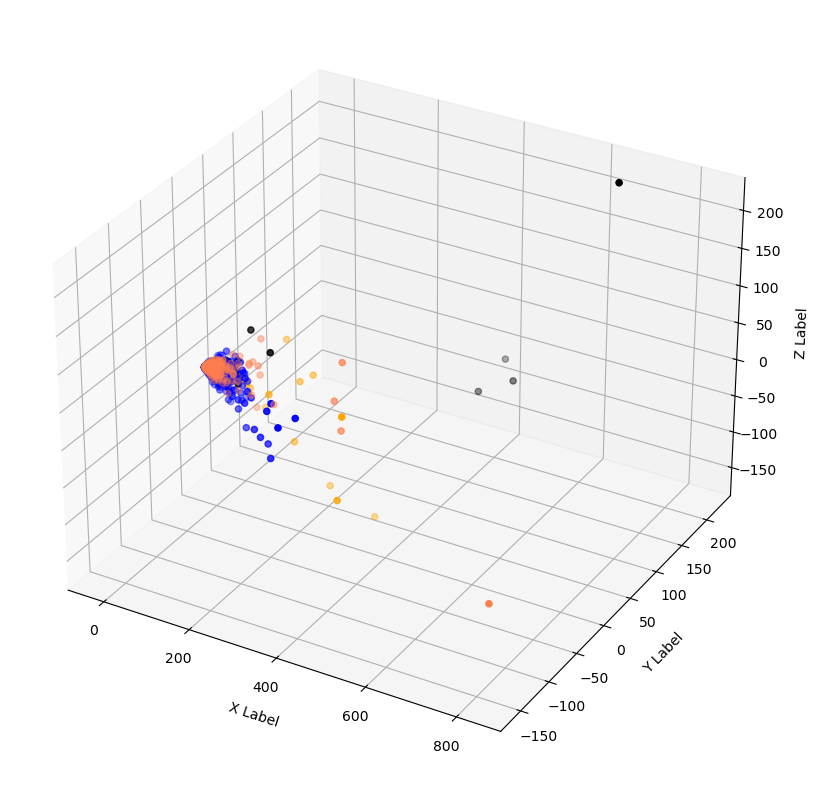

In [31]:
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_reduced.shape
categories
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = plt.subplot( projection = '3d' )

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
plt.show()


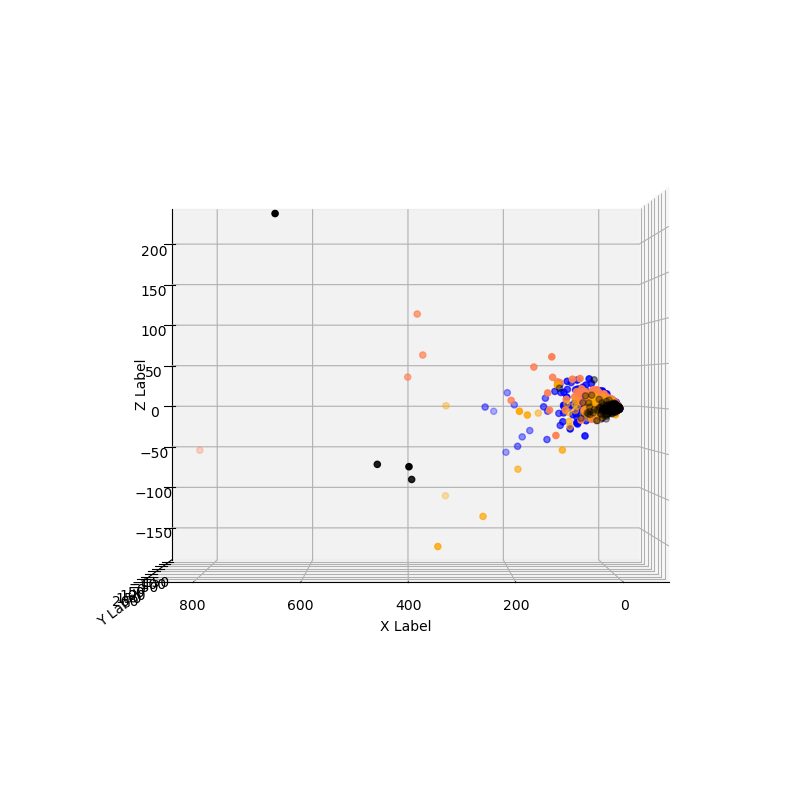

In [32]:
fig = plt.figure(figsize = (25,10))
ax = plt.subplot( projection = '3d' )

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(0,90)
plt.show()

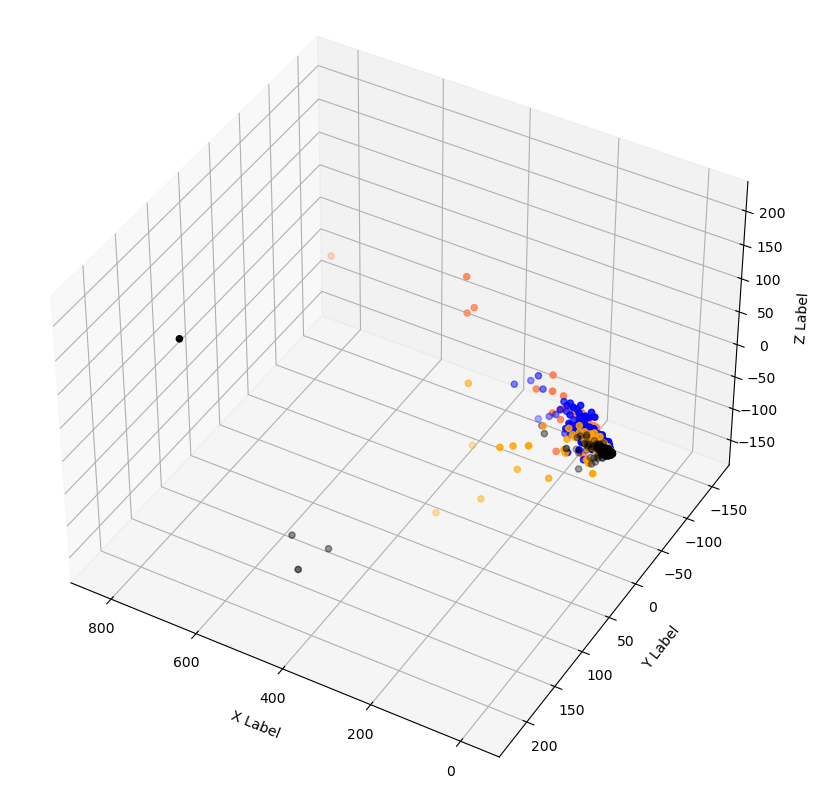

In [33]:
fig = plt.figure(figsize = (25,10))
ax = plt.subplot( projection = '3d' )

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(40,120)
plt.show()

### 5.5 Attribute Transformation / Aggregation
We can do other things with the term-vector matrix besides applying dimensionality reduction technique to deal with sparsity problem. Here we are going to generate a simple distribution of the words found in all the entire set of articles. Intuitively, this may not make any sense, but in data science sometimes we take some things for granted, and we just have to explore the data first before making any premature conclusions. On the topic of attribute transformation, we will take the word distribution and put the distribution in a scale that makes it easy to analyze patterns in the distrubution of words. Let us get into it!

First, we need to compute these frequencies for each term in all documents. Visually speaking, we are seeking to add values of the 2D matrix, vertically; i.e., sum of each column. You can also refer to this process as aggregation, which we won't explore further in this notebook because of the type of data we are dealing with. But I believe you get the idea of what that includes.  

In [34]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for

term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0] #sum of first term

134

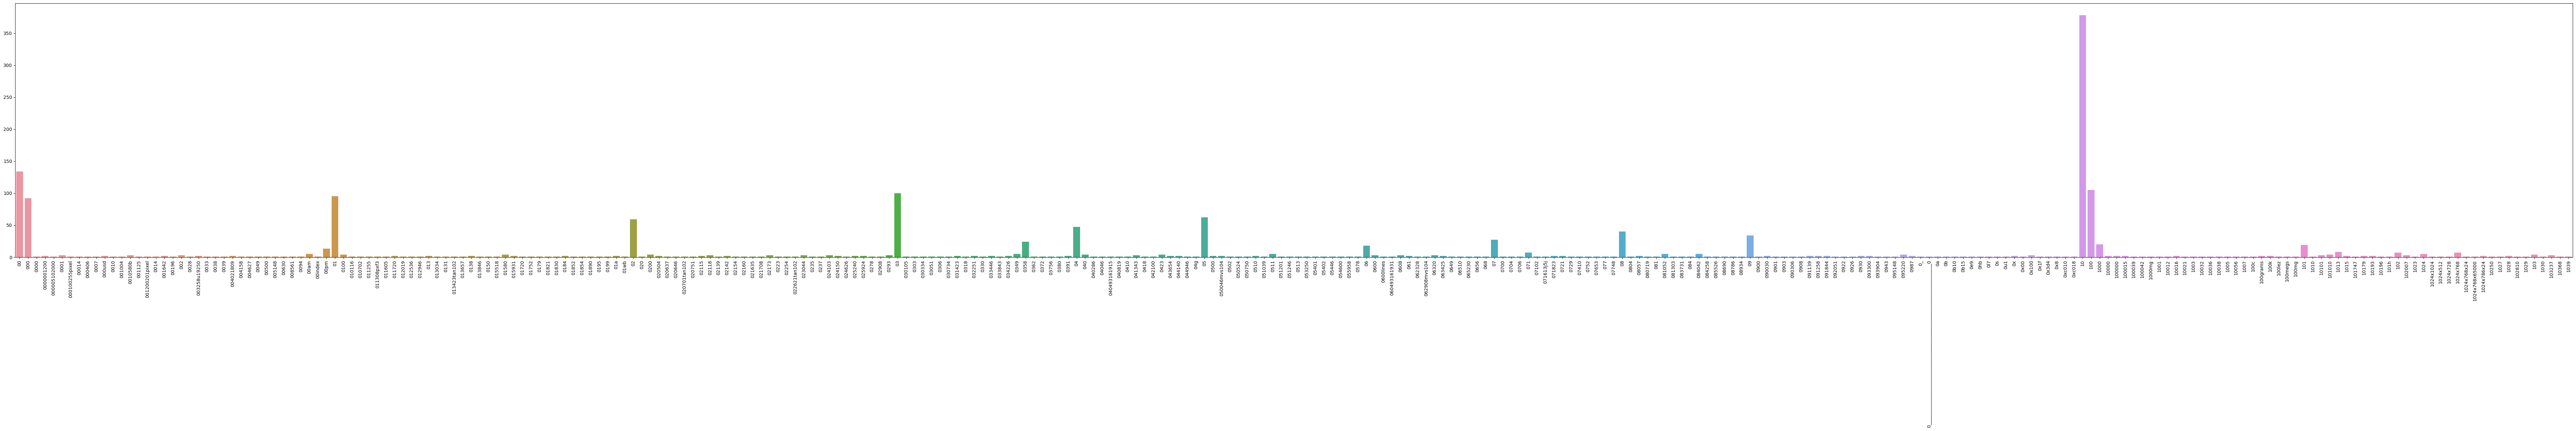

In [35]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [36]:
import plotly.express as px
px.bar(term_frequencies, x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300])



### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [37]:
# find the token frequencies exceed 100 times
# use pandas to bind token and num of frequencies together
array = pd.DataFrame({ 'x':count_vect.get_feature_names_out(),
                       'y':term_frequencies
                     })
filt = ( array['y'] > 100 )
array = array.loc[filt]
print(array)
px.bar(array['y'], x=array['x'][:300], y=array['y'][:300])

           x     y
0         00   134
242       10   378
243      100   105
336       11   215
431       12   236
...      ...   ...
35601    yes   249
35604    yet   274
35638    you  6157
35641  young   104
35648   your  1793

[801 rows x 2 columns]


### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [38]:
# use pandas sort_values()
array = pd.DataFrame({ 'x':count_vect.get_feature_names_out(),
                       'y':term_frequencies
                     })
array.sort_values( by=['y'],ascending=False,inplace=True)
px.bar(array['y'], x=array['x'][:300], y=array['y'][:300])

Since we already have those term frequencies, we can also transform the values in that vector into the log distribution. All we need is to import the math library provided by python and apply it to the array of values of the term frequency vector. This is a typical example of attribute transformation. Let's go for it. The log distribution is a technique to visualize the term frequency into a scale that makes you easily visualize the distribution in a more readable format. In other words, the variations between the term frequencies are now easy to observe. Let us try it out!

In [39]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

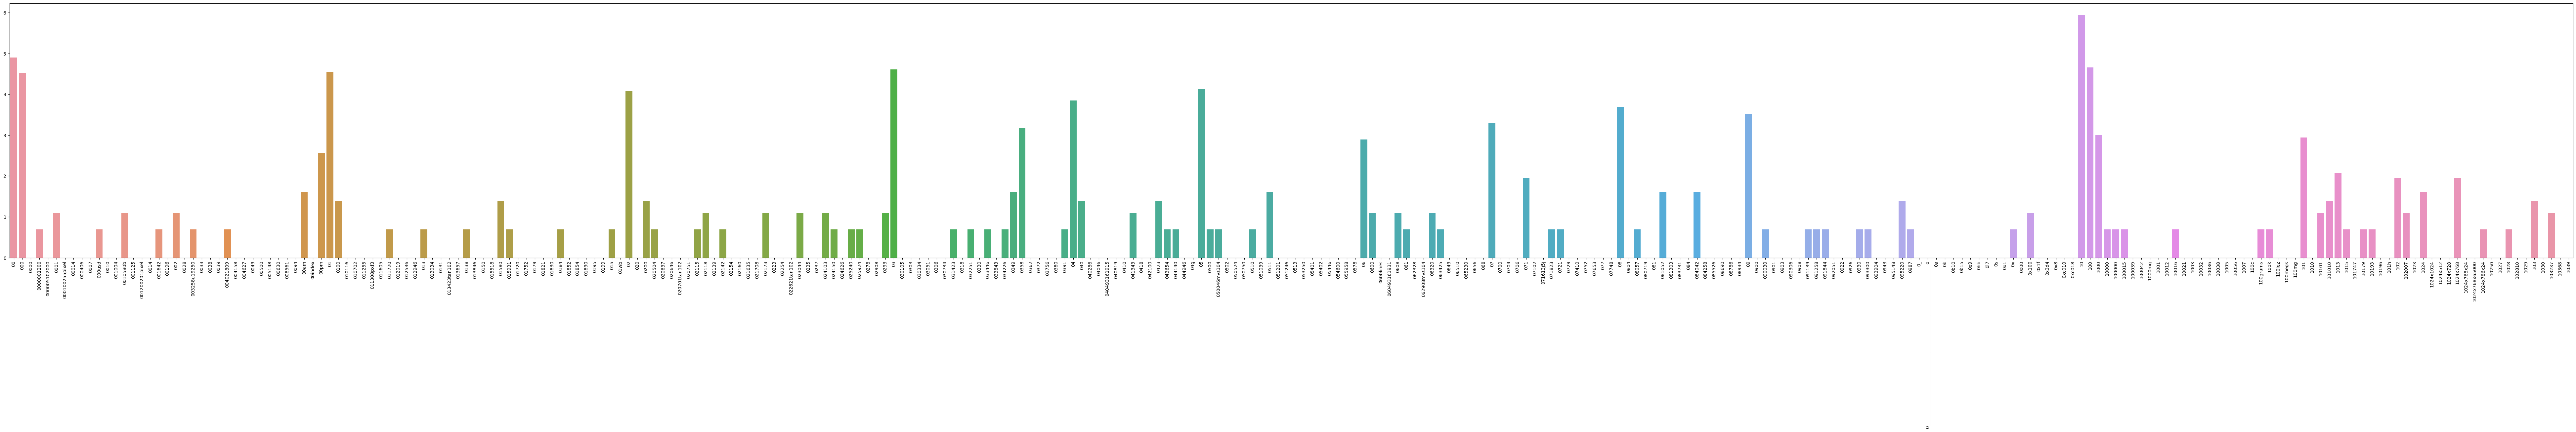

In [40]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### 5.6 Discretization and Binarization
In this section we are going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms. Given our current original dataset, we would like to transform one of the attributes, `category_name`, into four binary attributes. In other words, we are taking the category name and replacing it with a `n` asymmetric binary attributes. The logic behind this transformation is discussed in detail in the recommended Data Mining text book (please refer to it on page 58). People from the machine learning community also refer to this transformation as one-hot encoding, but as you may become aware later in the course, these concepts are all the same, we just have different prefrence on how we refer to the concepts. Let us take a look at what we want to achieve in code. 

In [41]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

   bin_category  
0  [0, 1, 0, 0]  
1  [0, 1, 0, 0]  
2  [0, 0, 0, 1]  
3  [0, 0, 0, 1]  
4  [0, 0, 0, 1]  
5  [0, 0, 0, 1]  
6  [0, 0, 0, 1]  
7  [0, 0, 1, 0]  
8  [0, 0, 1, 0]

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [42]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]
#ans : YES

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

   bin_category bin_category_name  
0  [0, 1, 0, 0]      [0, 1, 0, 0]  
1  [0, 1, 0, 0]      [0, 1, 0, 0]  
2  [0, 0, 0, 1]      [0, 0, 0, 1]  
3  [0, 0, 0, 1]      [0, 0, 0, 1]  
4  [0, 0, 0, 1]      [0, 0, 0, 1]  
5  [0, 0, 0, 1]      [0, 0, 0, 1]  
6  [0, 0, 0, 1]      [0, 0, 0, 1]  
7  [0, 0, 1, 0]      [0, 0, 1, 0]  
8  [0, 0, 1, 0]      [0, 0, 1, 0]

# PART2

In [249]:
import pandas as pd
import numpy as np

# my functions
import helpers.data_mining_helpers as dmh

txt_DB = []
token_DB = []
num_DB = []
dataset = ['amazon_cells_labelled.txt','imdb_labelled.txt','yelp_labelled.txt']
data_name = 'amazon_cells_labelled.txt'
path = 'sentiment labelled sentences/sentiment labelled sentences/'
f = open( path + data_name, encoding="utf-8"  )
txt =  f.readline()
while txt:
    temp = txt.split('\t')
    txt_DB.append(temp[0])
    num_DB.append( int(temp[1]))
    txt =  f.readline()
f.close()    
txt_list = []
for i in range(len(num_DB)):
    txt_list.append([txt_DB[i],num_DB[i]])
np.array(txt_list)
X1 = pd.DataFrame.from_records(txt_list , columns= ['text','category'])
X1['data_from'] = data_name
data_name = 'imdb_labelled.txt'

f = open( path + data_name, encoding="utf-8" )
txt =  f.readline()
txt_DB=[]
num_DB=[]
while txt:
    temp = txt.split('\t')
    txt_DB.append(temp[0])
    num_DB.append( int(temp[1]))
    txt =  f.readline()
f.close() 
txt_list = []
for i in range(len(num_DB)):
    txt_list.append([txt_DB[i],num_DB[i]])
np.array(txt_list)    
X2 = pd.DataFrame.from_records(txt_list , columns= ['text','category'])
X2['data_from'] = data_name
X1 = pd.concat([X1, X2], ignore_index=True)   
data_name = 'yelp_labelled.txt'

f = open( path + data_name, encoding="utf-8" )
txt =  f.readline()
txt_DB=[]
num_DB=[]
while txt:
    temp = txt.split('\t')
    txt_DB.append(temp[0])
    num_DB.append( int(temp[1]))
    txt =  f.readline()
f.close() 
txt_list = []
for i in range(len(num_DB)):
    txt_list.append([txt_DB[i],num_DB[i]])
np.array(txt_list)    
X2 = pd.DataFrame.from_records(txt_list , columns= ['text','category'])
X2['data_from'] = data_name
X = pd.concat([X1, X2], ignore_index=True)   
X

text  category  \
0     So there is no way for me to plug it in here i...         0   
1                           Good case, Excellent value.         1   
2                                Great for the jawbone.         1   
3     Tied to charger for conversations lasting more...         0   
4                                     The mic is great.         1   
...                                                 ...       ...   
2995  I think food should have flavor and texture an...         0   
2996                           Appetite instantly gone.         0   
2997  Overall I was not impressed and would not go b...         0   
2998  The whole experience was underwhelming, and I ...         0   
2999  Then, as if I hadn't wasted enough of my life ...         0   

                      data_from  
0     amazon_cells_labelled.txt  
1     amazon_cells_labelled.txt  
2     amazon_cells_labelled.txt  
3     amazon_cells_labelled.txt  
4     amazon_cells_labelled.txt  
...                         ...  
2995          yelp_labelled.txt  
2996          yelp_labelled.txt  
2997          yelp_labelled.txt  
2998          yelp_labelled.txt  
2999          yelp_labelled.txt  

[3000 rows x 3 columns]

### Missing Values


In [44]:
X.isnull().apply(lambda x: dmh.check_missing_values(x) ) 

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                            data_from  
0  The amoung of missing records is:   
1                                   0

### Dealing with Duplicate Data

In [45]:
sum(X.duplicated())


17

In [46]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe
#不會顯示刪除的重複資料
sum(X.duplicated())

0

In [47]:
X
#become only 2966 data ( delete the 34 data)

text  category  \
0     So there is no way for me to plug it in here i...         0   
1                           Good case, Excellent value.         1   
2                                Great for the jawbone.         1   
3     Tied to charger for conversations lasting more...         0   
4                                     The mic is great.         1   
...                                                 ...       ...   
2995  I think food should have flavor and texture an...         0   
2996                           Appetite instantly gone.         0   
2997  Overall I was not impressed and would not go b...         0   
2998  The whole experience was underwhelming, and I ...         0   
2999  Then, as if I hadn't wasted enough of my life ...         0   

                      data_from  
0     amazon_cells_labelled.txt  
1     amazon_cells_labelled.txt  
2     amazon_cells_labelled.txt  
3     amazon_cells_labelled.txt  
4     amazon_cells_labelled.txt  
...                         ...  
2995          yelp_labelled.txt  
2996          yelp_labelled.txt  
2997          yelp_labelled.txt  
2998          yelp_labelled.txt  
2999          yelp_labelled.txt  

[2966 rows x 3 columns]

### Data Preprocessing

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
X_sample = X.sample(n=1000)

imdb_labelled.txt            994
yelp_labelled.txt            992
amazon_cells_labelled.txt    980
Name: data_from, dtype: int64


<AxesSubplot:title={'center':'Data distribution'}>

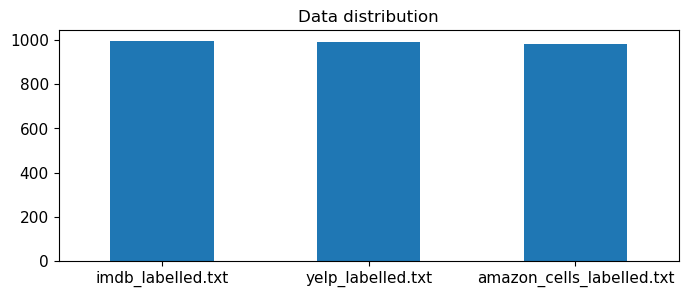

In [50]:
print(X.data_from.value_counts())

# plot barchart for X
X.data_from.value_counts().plot(kind = 'bar',
                                    title = 'Data distribution',       
                                    rot = 0, fontsize = 11, figsize = (8,3))

### >>> **Exercise (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

yelp_labelled.txt            338
imdb_labelled.txt            334
amazon_cells_labelled.txt    328
Name: data_from, dtype: int64
amazon_cells_labelled.txt    348
yelp_labelled.txt            327
imdb_labelled.txt            325
Name: data_from, dtype: int64


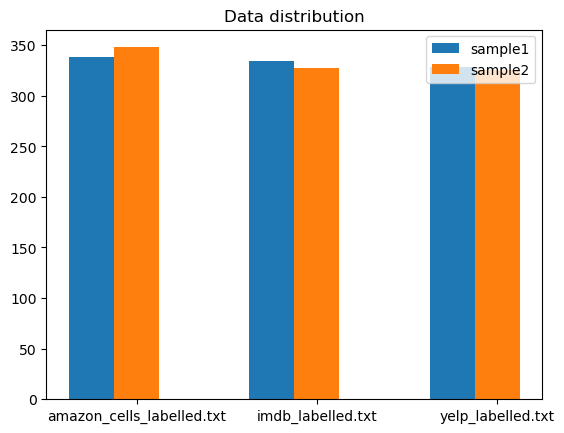

In [51]:
X_sample_1 = X.sample(n=1000) #random state
X_sample_2 = X.sample(n=1000) #random state
x = np.arange(len(dataset))
y1 = X_sample_1.data_from.value_counts() 
print( y1 )
y2 = X_sample_2.data_from.value_counts()
print( y2 )
#upper_bound = max(max(X_sample_1.category_name.value_counts()),max(X_sample_2.category_name.value_counts()))+50  #276+50
plt.bar(x, y1,  label = 'sample1', width=0.25)
plt.bar(x+0.25, y2,  label = 'sample2', width=0.25)
plt.xticks( x+0.25, dataset)
plt.legend()
plt.title('Data distribution')
plt.show()

### 5.3 Feature subset selection
Okay, so we are making some headway here. Let us now make things a bit more interesting. We are going to do something different from what we have been doing thus far. We are going use a bit of everything that we have learned so far. Briefly speaking, we are going to move away from our main dataset (one form of feature subset selection), and we are going to generate a document-term matrix from the original dataset. In other words we are going to be creating something like this.

In [52]:
import nltk
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")
#tokenization, remove step words(e.g. i, a , creat an nigram)


['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

### **>>> Exercise:**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [54]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [55]:
ans = 0
array = X_counts[0:5, 0:100].toarray()
for i in range(100):
    if array[3][i] == [1]:
        ans = i
print(ans)
print(count_vect.get_feature_names_out()[ans])
count_vect.get_feature_names_out()[0:46]
#ans: "45"
#count_vect.get_feature_names_out()[45] = "45"

45
45


array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17',
       '18', '18th', '1928', '1947', '1948', '1949', '1971', '1973',
       '1979', '1980', '1986', '1995', '1998', '20', '2000', '2005',
       '2006', '2007', '20th', '2160', '23', '24', '25', '2mp', '30',
       '30s', '325', '35', '350', '375', '3o', '40', '40min', '42', '44',
       '45'], dtype=object)

### **>>> Exercise (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

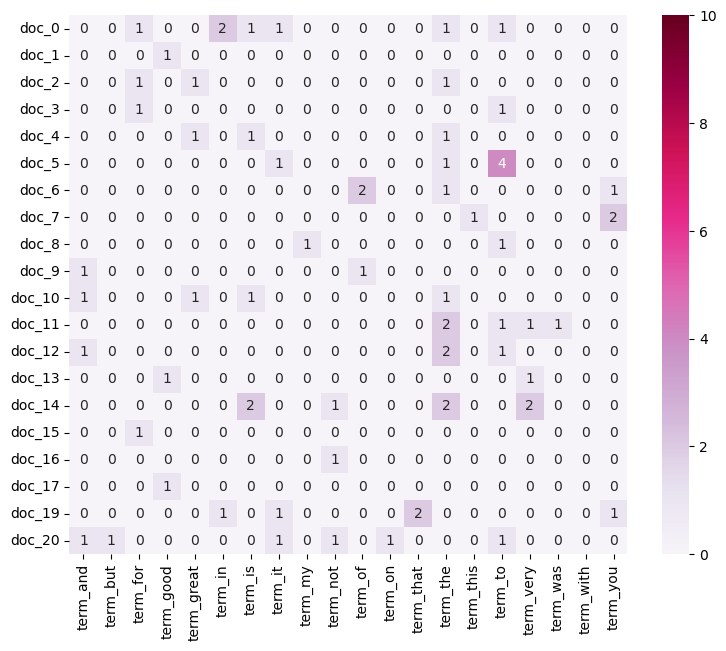

In [56]:
import seaborn as sns
# first twenty features only
count_vect1 = CountVectorizer(max_features=20)
X_max20 = count_vect1.fit_transform(X.text) #learn the vocabulary and return document-term matrix

plot_x = ["term_"+str(i) for i in count_vect1.get_feature_names_out()[0:20]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_max20[:20,0:20].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=10,annot=True)

### 5.4 Dimensionality Reduction
Since we have just touched on the concept of sparsity most naturally the problem of "curse of dimentionality" comes up. I am not going to get into the full details of what dimensionality reduction is and what it is good for just the fact that is an excellent technique for visualizing data efficiently (please refer to notes for more information). All I can say is that we are going to deal with the issue of sparsity with a few lines of code. And we are going to try to visualize our data more efficiently with the results.

We are going to make use of Principal Component Analysis to efficiently reduce the dimensions of our data, with the main goal of "finding a projection that captures the largest amount of variation in the data." This concept is important as it is very useful for visualizing and observing the characteristics of our dataset.

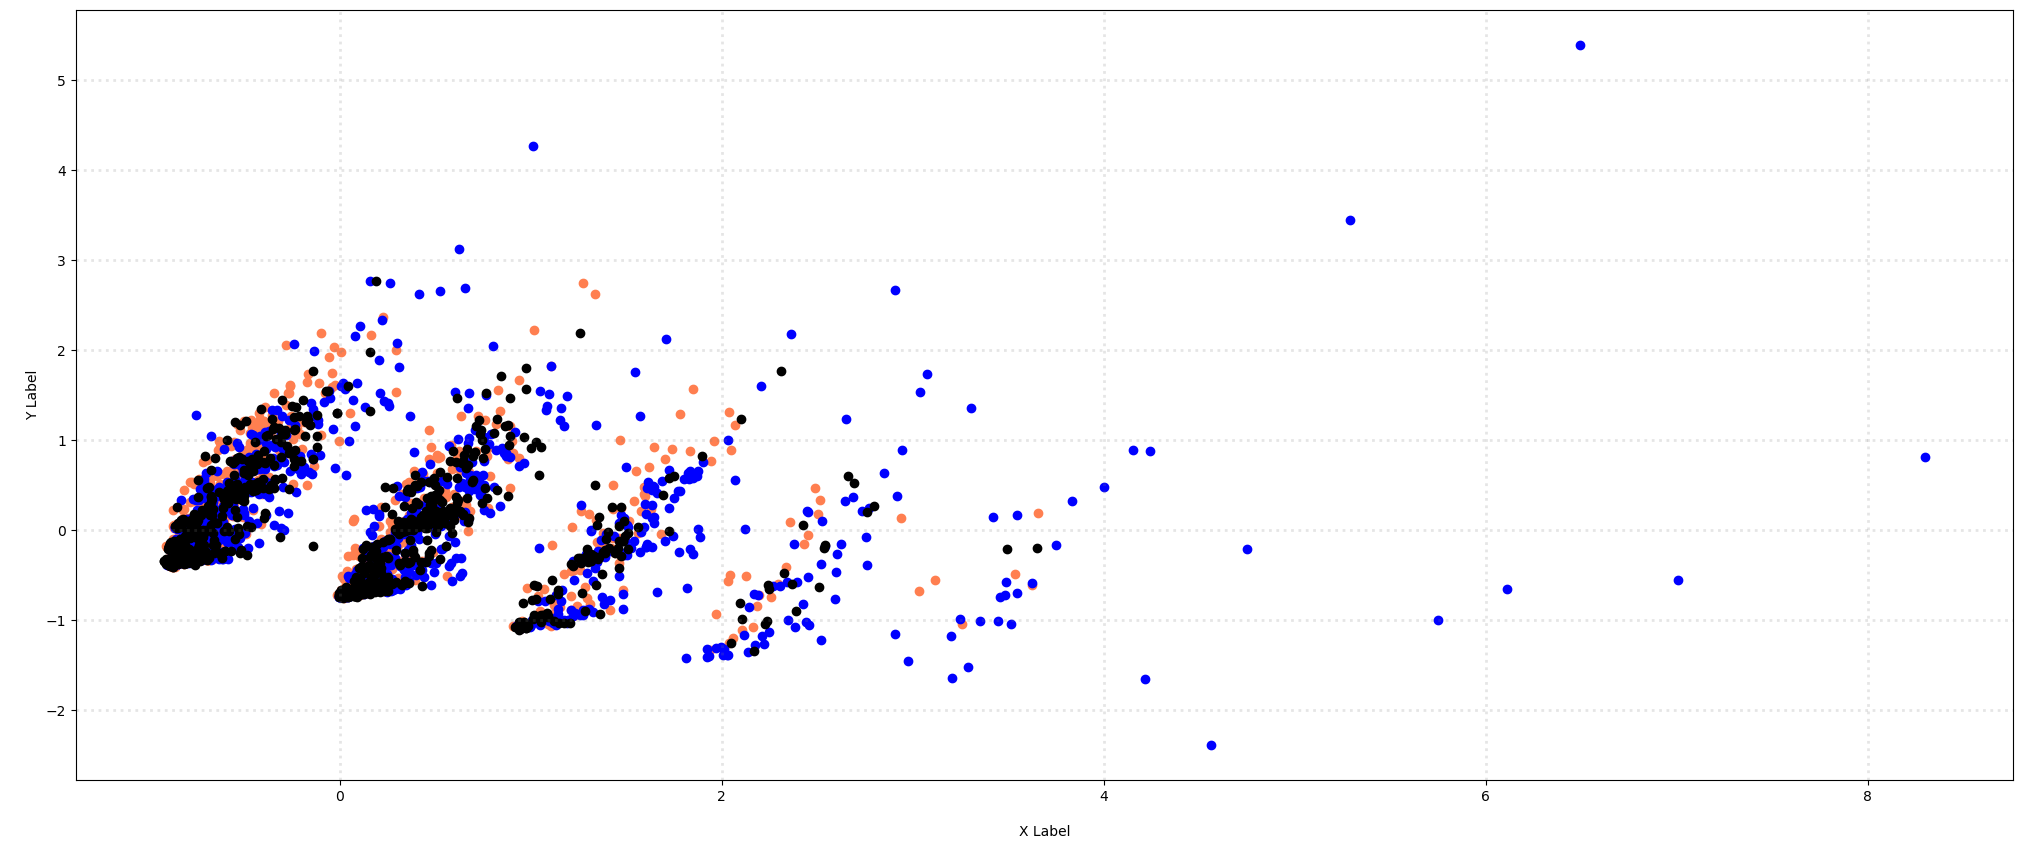

In [57]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, datasets in zip(col, dataset):
    xs = X_reduced[X['data_from'] == datasets].T[0]
    ys = X_reduced[X['data_from'] == datasets].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### >>> Exercise  (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

𝐻𝑖𝑛𝑡 : you can refer to Axes3D in the documentation.

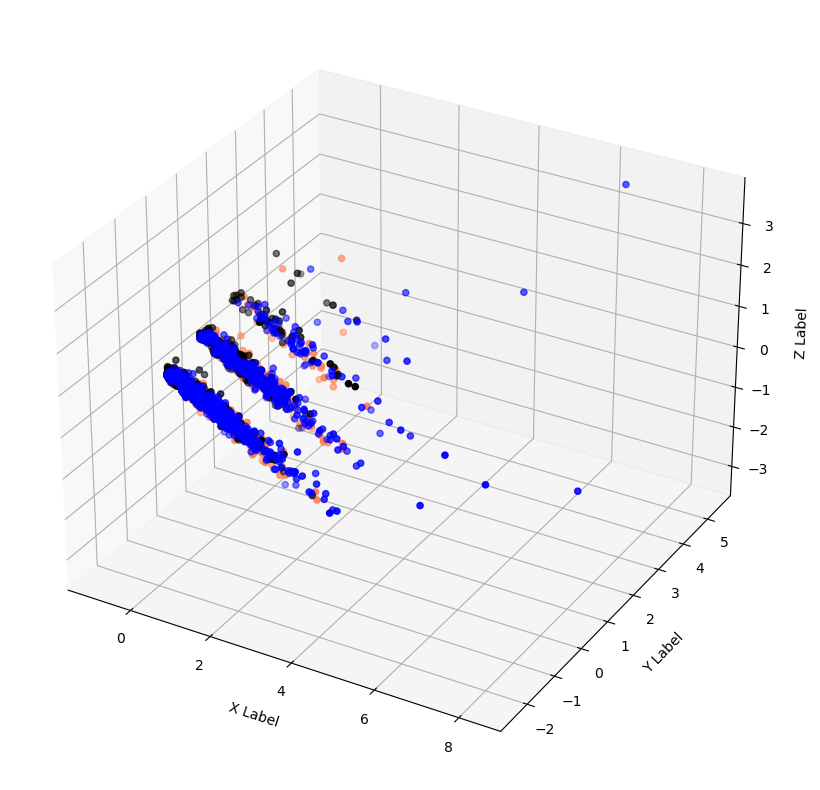

In [58]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_reduced.shape
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = plt.subplot( projection = '3d' )

for c, datasets in zip(col, dataset ):
    xs = X_reduced[X['data_from'] == datasets].T[0]
    ys = X_reduced[X['data_from'] == datasets].T[1]
    zs = X_reduced[X['data_from'] == datasets].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
plt.show()


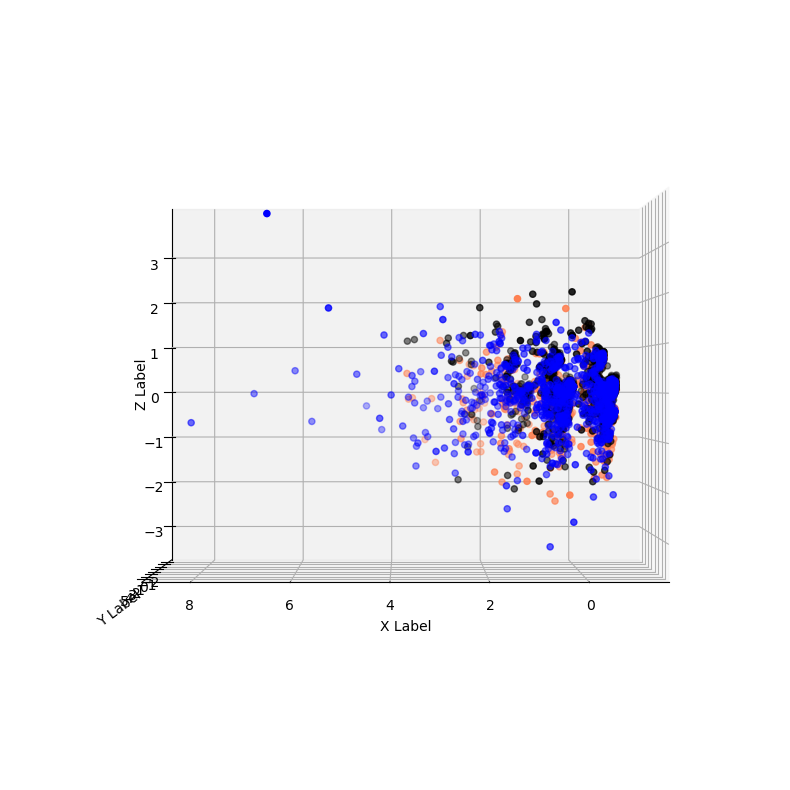

In [59]:

fig = plt.figure(figsize = (25,10))
ax = plt.subplot( projection = '3d' )

for c, datasets in zip(col, dataset ):
    xs = X_reduced[X['data_from'] == datasets].T[0]
    ys = X_reduced[X['data_from'] == datasets].T[1]
    zs = X_reduced[X['data_from'] == datasets].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(0,90)
plt.show()

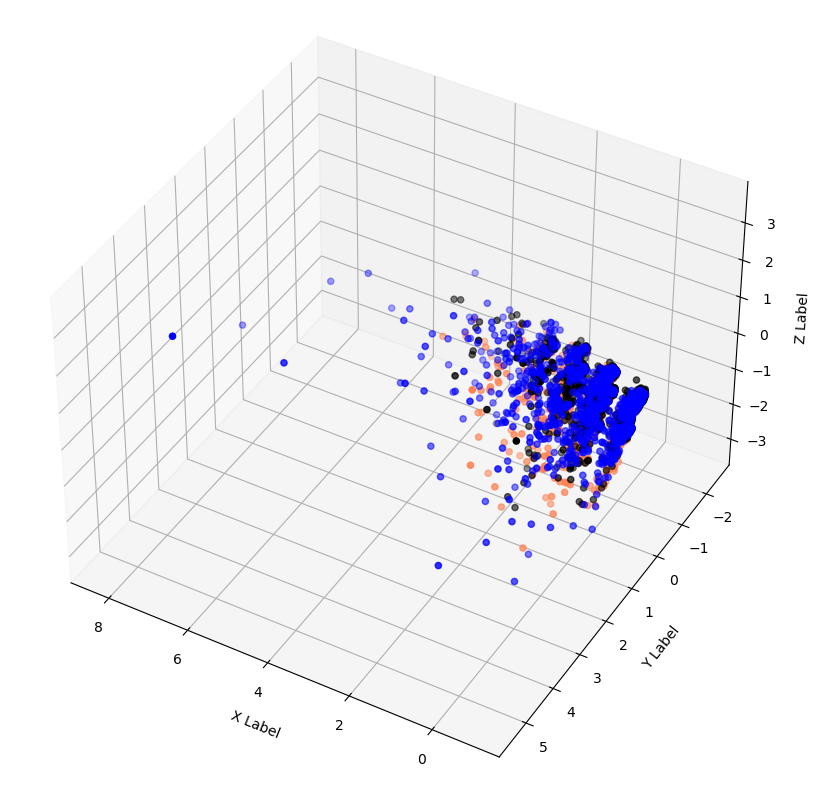

In [60]:

fig = plt.figure(figsize = (25,10))
ax = plt.subplot( projection = '3d' )

for c, datasets in zip(col, dataset ):
    xs = X_reduced[X['data_from'] == datasets].T[0]
    ys = X_reduced[X['data_from'] == datasets].T[1]
    zs = X_reduced[X['data_from'] == datasets].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(40,120)
plt.show()

### 5.5 Attribute Transformation / Aggregation
We can do other things with the term-vector matrix besides applying dimensionality reduction technique to deal with sparsity problem. Here we are going to generate a simple distribution of the words found in all the entire set of articles. Intuitively, this may not make any sense, but in data science sometimes we take some things for granted, and we just have to explore the data first before making any premature conclusions. On the topic of attribute transformation, we will take the word distribution and put the distribution in a scale that makes it easy to analyze patterns in the distrubution of words. Let us get into it!

In [61]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for

term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0] #sum of first term

1

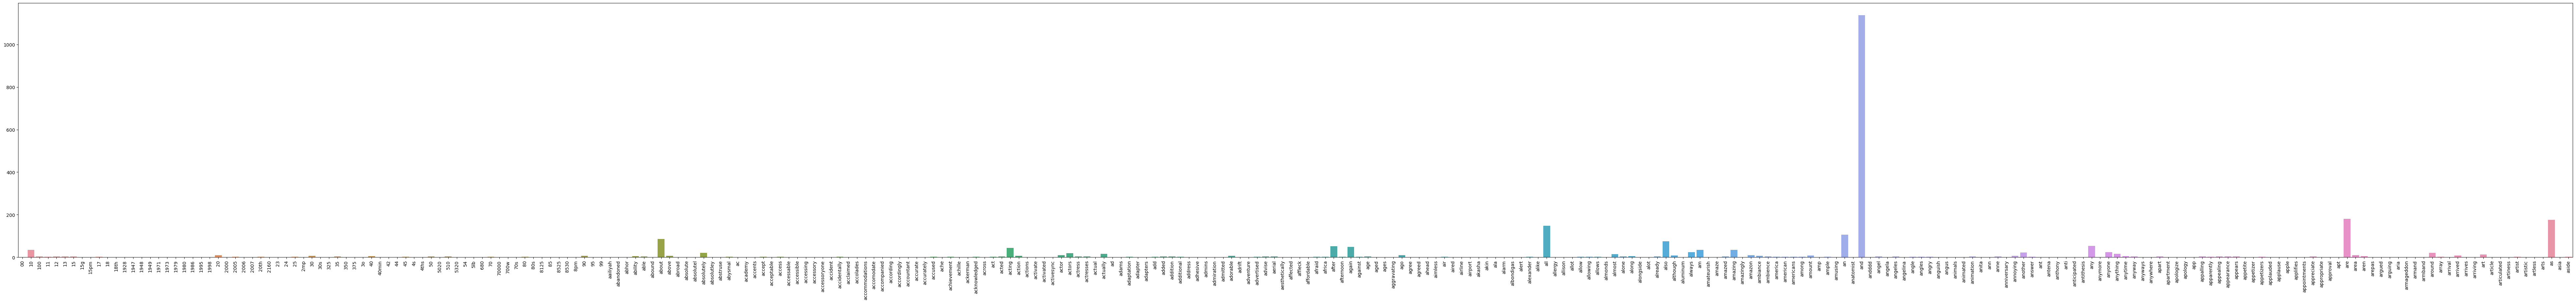

In [62]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [63]:
import plotly.express as px
px.bar(term_frequencies, x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300])


### >>> **Exercise  (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [64]:
array = pd.DataFrame({ 'x':count_vect.get_feature_names_out(),
                       'y':term_frequencies
                     })
array.sort_values( by=['y'],ascending=False,inplace=True)
px.bar(array['y'], x=array['x'][:300], y=array['y'][:300])

In [65]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

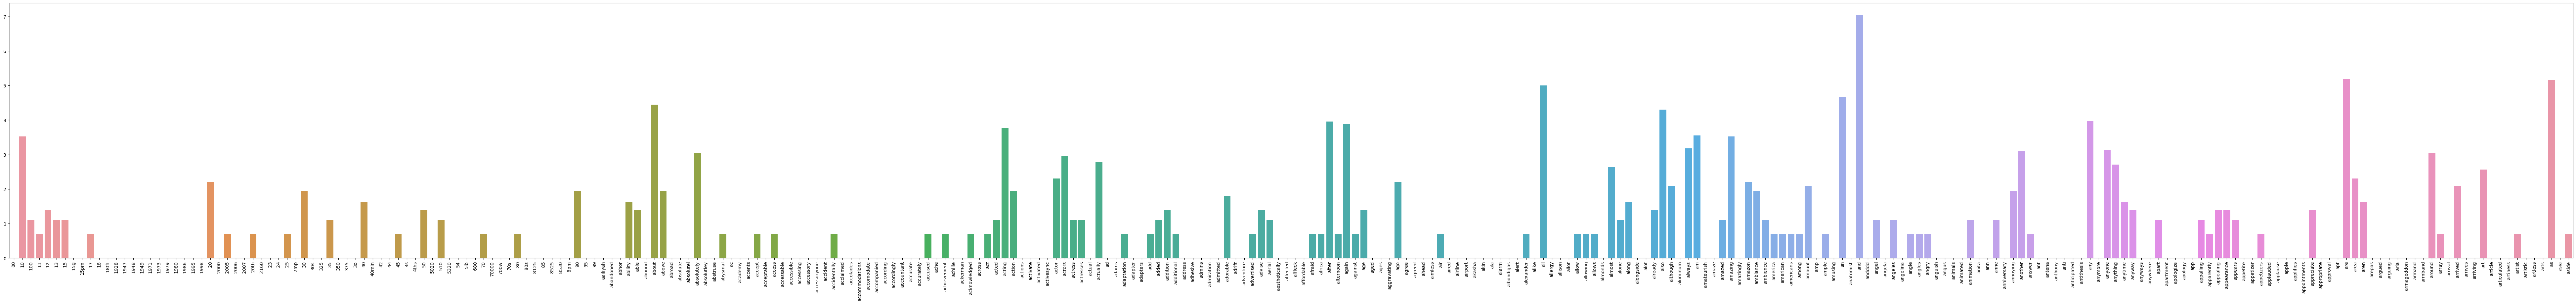

In [66]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### 5.6 Discretization and Binarization
In this section we are going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms. Given our current original dataset, we would like to transform one of the attributes, category_name, into four binary attributes. In other words, we are taking the category name and replacing it with a n asymmetric binary attributes. The logic behind this transformation is discussed in detail in the recommended Data Mining text book (please refer to it on page 58). People from the machine learning community also refer to this transformation as one-hot encoding, but as you may become aware later in the course, these concepts are all the same, we just have different prefrence on how we refer to the concepts. Let us take a look at what we want to achieve in code.

In [67]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.data_from)
X['bin_data_from'] = mlb.transform(X['data_from']).tolist()
X_Sample = X.sample(n=100)
X_Sample[0:9]

text  category  \
1092                               It was horrendous.           0   
1398  Non-linear narration thus many flashbacks and ...         1   
232                   Don't waste your $$$ on this one.         0   
1460  I know he was a contract player with little co...         0   
99              I'm very disappointed with my decision.         0   
650                                Battery is terrible.         0   
1261  ***SPOILERS*** Whatever else can (or can't) be...         1   
1197                               This movie is BAD.           0   
2658                  It was just not a fun experience.         1   

                      data_from  \
1092          imdb_labelled.txt   
1398          imdb_labelled.txt   
232   amazon_cells_labelled.txt   
1460          imdb_labelled.txt   
99    amazon_cells_labelled.txt   
650   amazon_cells_labelled.txt   
1261          imdb_labelled.txt   
1197          imdb_labelled.txt   
2658          yelp_labelled.txt   

                                               unigrams bin_data_from  
1092                           [It, was, horrendous, .]     [0, 1, 0]  
1398  [Non-linear, narration, thus, many, flashbacks...     [0, 1, 0]  
232   [Do, n't, waste, your, $, $, $, on, this, one, .]     [1, 0, 0]  
1460  [I, know, he, was, a, contract, player, with, ...     [0, 1, 0]  
99    [I, 'm, very, disappointed, with, my, decision...     [1, 0, 0]  
650                          [Battery, is, terrible, .]     [1, 0, 0]  
1261  [*, *, *, SPOILERS, *, *, *, Whatever, else, c...     [0, 1, 0]  
1197                          [This, movie, is, BAD, .]     [0, 1, 0]  
2658        [It, was, just, not, a, fun, experience, .]     [0, 0, 1]

## Part 3

In [205]:
import pandas as pd
import numpy as np

# my functions
import helpers.data_mining_helpers as dmh

txt_DB = []
token_DB = []
num_DB = []
dataset = ['amazon_cells_labelled.txt','imdb_labelled.txt','yelp_labelled.txt']
data_name = 'amazon_cells_labelled.txt'
path = 'sentiment labelled sentences/sentiment labelled sentences/'
f = open( path + data_name, encoding="utf-8"  )
txt =  f.readline()
while txt:
    temp = txt.split('\t')
    txt_DB.append(temp[0])
    num_DB.append( int(temp[1]))
    txt =  f.readline()
f.close()    
txt_list = []
for i in range(len(num_DB)):
    txt_list.append([txt_DB[i],num_DB[i]])
np.array(txt_list)
X1 = pd.DataFrame.from_records(txt_list , columns= ['text','category'])
X1['data_from'] = data_name
data_name = 'imdb_labelled.txt'

f = open( path + data_name, encoding="utf-8" )
txt =  f.readline()
txt_DB=[]
num_DB=[]
while txt:
    temp = txt.split('\t')
    txt_DB.append(temp[0])
    num_DB.append( int(temp[1]))
    txt =  f.readline()
f.close() 
txt_list = []
for i in range(len(num_DB)):
    txt_list.append([txt_DB[i],num_DB[i]])
np.array(txt_list)    
X2 = pd.DataFrame.from_records(txt_list , columns= ['text','category'])
X2['data_from'] = data_name
X1 = pd.concat([X1, X2], ignore_index=True)   
data_name = 'yelp_labelled.txt'

f = open( path + data_name, encoding="utf-8" )
txt =  f.readline()
txt_DB=[]
num_DB=[]
while txt:
    temp = txt.split('\t')
    txt_DB.append(temp[0])
    num_DB.append( int(temp[1]))
    txt =  f.readline()
f.close() 
txt_list = []
for i in range(len(num_DB)):
    txt_list.append([txt_DB[i],num_DB[i]])
np.array(txt_list)    
X2 = pd.DataFrame.from_records(txt_list , columns= ['text','category'])
X2['data_from'] = data_name
X = pd.concat([X1, X2], ignore_index=True)   
X

text  category  \
0     So there is no way for me to plug it in here i...         0   
1                           Good case, Excellent value.         1   
2                                Great for the jawbone.         1   
3     Tied to charger for conversations lasting more...         0   
4                                     The mic is great.         1   
...                                                 ...       ...   
2995  I think food should have flavor and texture an...         0   
2996                           Appetite instantly gone.         0   
2997  Overall I was not impressed and would not go b...         0   
2998  The whole experience was underwhelming, and I ...         0   
2999  Then, as if I hadn't wasted enough of my life ...         0   

                      data_from  
0     amazon_cells_labelled.txt  
1     amazon_cells_labelled.txt  
2     amazon_cells_labelled.txt  
3     amazon_cells_labelled.txt  
4     amazon_cells_labelled.txt  
...                         ...  
2995          yelp_labelled.txt  
2996          yelp_labelled.txt  
2997          yelp_labelled.txt  
2998          yelp_labelled.txt  
2999          yelp_labelled.txt  

[3000 rows x 3 columns]

### Missing Values

In [206]:
X.isnull().apply(lambda x: dmh.check_missing_values(x) ) 

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                            data_from  
0  The amoung of missing records is:   
1                                   0

### Dealing with Duplicate Data

In [207]:
sum(X.duplicated())


17

In [208]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe
#不會顯示刪除的重複資料
sum(X.duplicated())


0

In [209]:
X
#become only2966 data ( delete the 34 data)

text  category  \
0     So there is no way for me to plug it in here i...         0   
1                           Good case, Excellent value.         1   
2                                Great for the jawbone.         1   
3     Tied to charger for conversations lasting more...         0   
4                                     The mic is great.         1   
...                                                 ...       ...   
2995  I think food should have flavor and texture an...         0   
2996                           Appetite instantly gone.         0   
2997  Overall I was not impressed and would not go b...         0   
2998  The whole experience was underwhelming, and I ...         0   
2999  Then, as if I hadn't wasted enough of my life ...         0   

                      data_from  
0     amazon_cells_labelled.txt  
1     amazon_cells_labelled.txt  
2     amazon_cells_labelled.txt  
3     amazon_cells_labelled.txt  
4     amazon_cells_labelled.txt  
...                         ...  
2995          yelp_labelled.txt  
2996          yelp_labelled.txt  
2997          yelp_labelled.txt  
2998          yelp_labelled.txt  
2999          yelp_labelled.txt  

[2966 rows x 3 columns]

In [210]:
#from nltk.corpus import stopwords
#filtered_sample_text = [w for w in X.text.split() if not w in stopwords]

### Data Preprocessing

In [211]:
import matplotlib.pyplot as plt
%matplotlib inline

In [212]:
from sklearn.feature_extraction.text import TfidfVectorizer 
vectorizer = TfidfVectorizer(stop_words='english') #exclude the stop words
X_counts = vectorizer.fit_transform(X.text) #learn the vocabulary and return TF-IDF document-term matrix
X_fq = X_counts.toarray()
print(X_fq)
xs = X.text
ys = vectorizer.get_feature_names_out()
X_freqency = pd.DataFrame.from_records(X_fq,index = xs, columns = ys )
print(X_freqency)
analyze = vectorizer.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")
#tokenization, remove step words(e.g. i, a , creat an nigram)
print(X_counts.shape)
print(vectorizer.get_feature_names_out())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
                                                     00   10  100   11   12  \
text                                                                          
So there is no way for me to plug it in here in...  0.0  0.0  0.0  0.0  0.0   
Good case, Excellent value.                         0.0  0.0  0.0  0.0  0.0   
Great for the jawbone.                              0.0  0.0  0.0  0.0  0.0   
Tied to charger for conversations lasting more ...  0.0  0.0  0.0  0.0  0.0   
The mic is great.                                   0.0  0.0  0.0  0.0  0.0   
...                                                 ...  ...  ...  ...  ...   
I think food should have flavor and texture and...  0.0  0.0  0.0  0.0  0.0   
Appetite instantly gone.                            0.0  0.0  0.0  0.0  0.0   
Overall I was not impressed and would not go back.  0.

### Heapmap

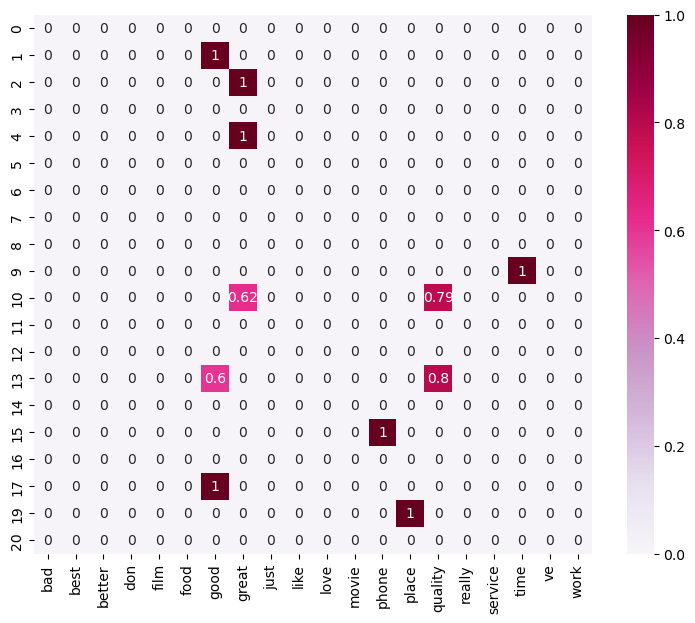

In [213]:
import seaborn as sns
# first twenty features only
vectorizer1 = TfidfVectorizer(stop_words='english',max_features=20)
X_max20 = vectorizer1.fit_transform(X.text) #learn the vocabulary and return document-term matrix
plot_x = [str(i) for i in vectorizer1.get_feature_names_out()[0:20]]
# obtain document index
plot_y = [str(i) for i in list(X.index)[0:20]]
plot_z = X_max20[:20,0:20].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1,annot=True)

In [214]:
vectorizer1.get_feature_names_out()
len(vectorizer1.get_feature_names_out())

20

### 5.4 Dimensionality Reduction
Since we have just touched on the concept of sparsity most naturally the problem of "curse of dimentionality" comes up. I am not going to get into the full details of what dimensionality reduction is and what it is good for just the fact that is an excellent technique for visualizing data efficiently (please refer to notes for more information). All I can say is that we are going to deal with the issue of sparsity with a few lines of code. And we are going to try to visualize our data more efficiently with the results.

We are going to make use of Principal Component Analysis to efficiently reduce the dimensions of our data, with the main goal of "finding a projection that captures the largest amount of variation in the data." This concept is important as it is very useful for visualizing and observing the characteristics of our dataset. 

## kdeplot 核密度圖

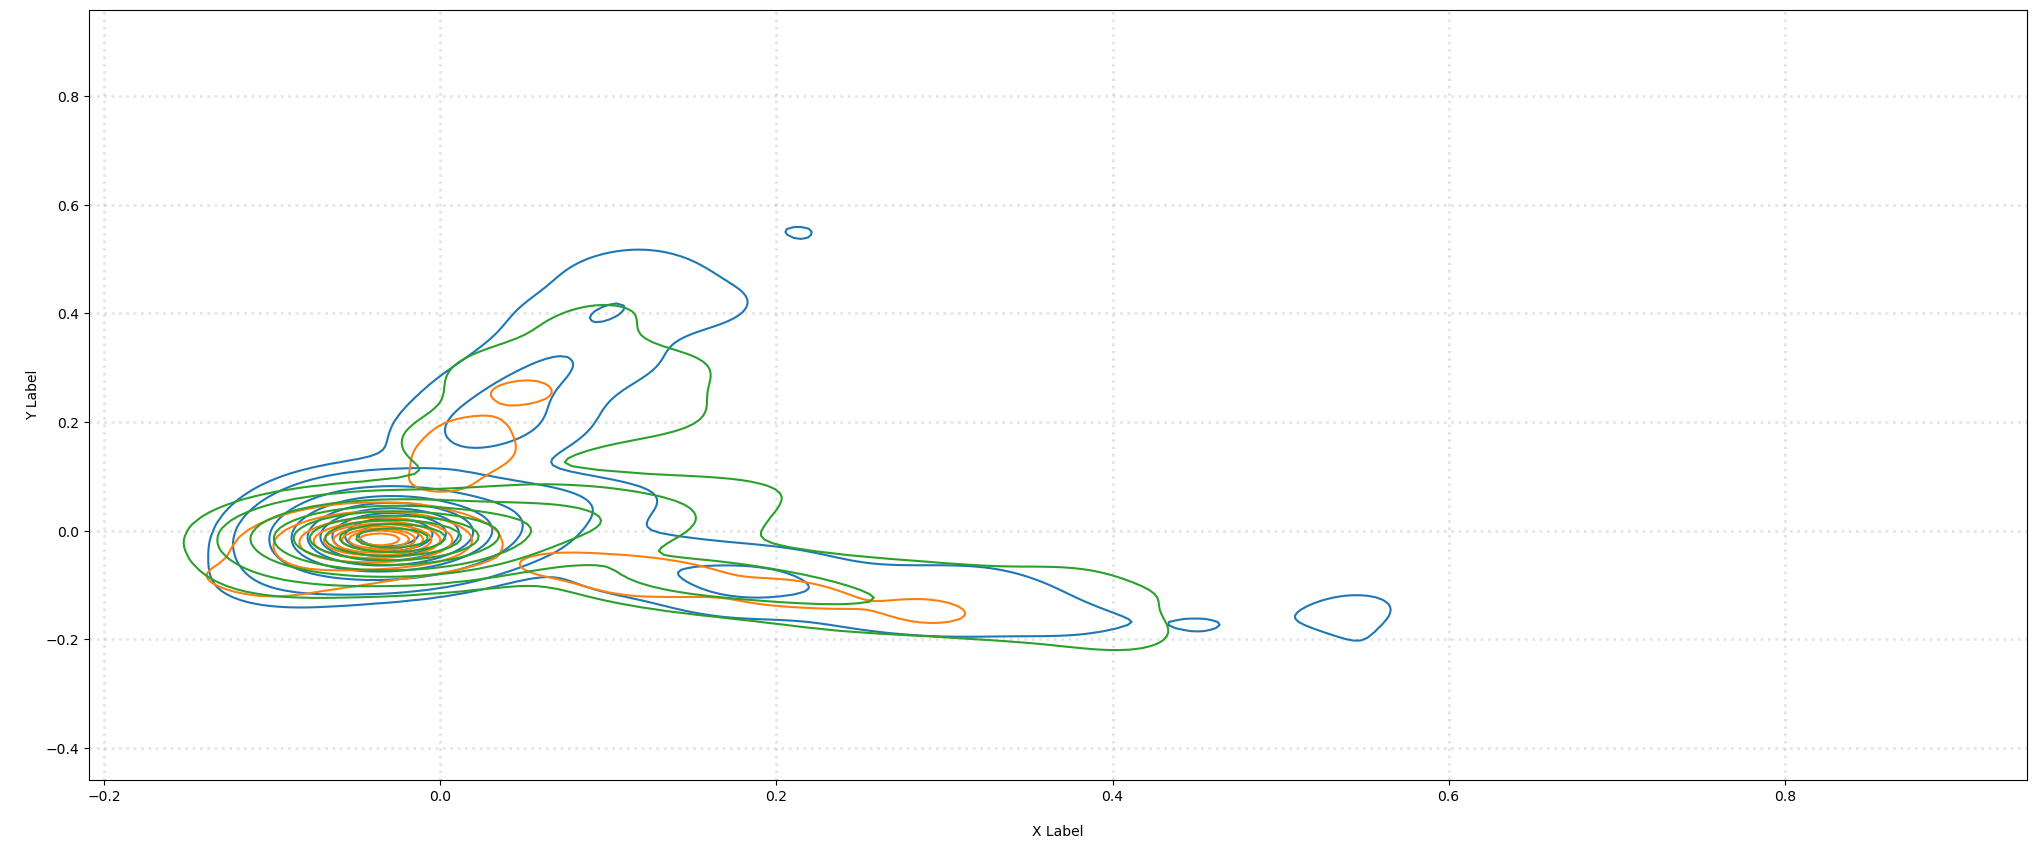

In [215]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, datasets in zip(col, dataset):
    xs = X_reduced[X['data_from'] == datasets].T[0]
    ys = X_reduced[X['data_from'] == datasets].T[1]
    sns.kdeplot( x=xs, y=ys )

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

## boxplot 盒狀圖

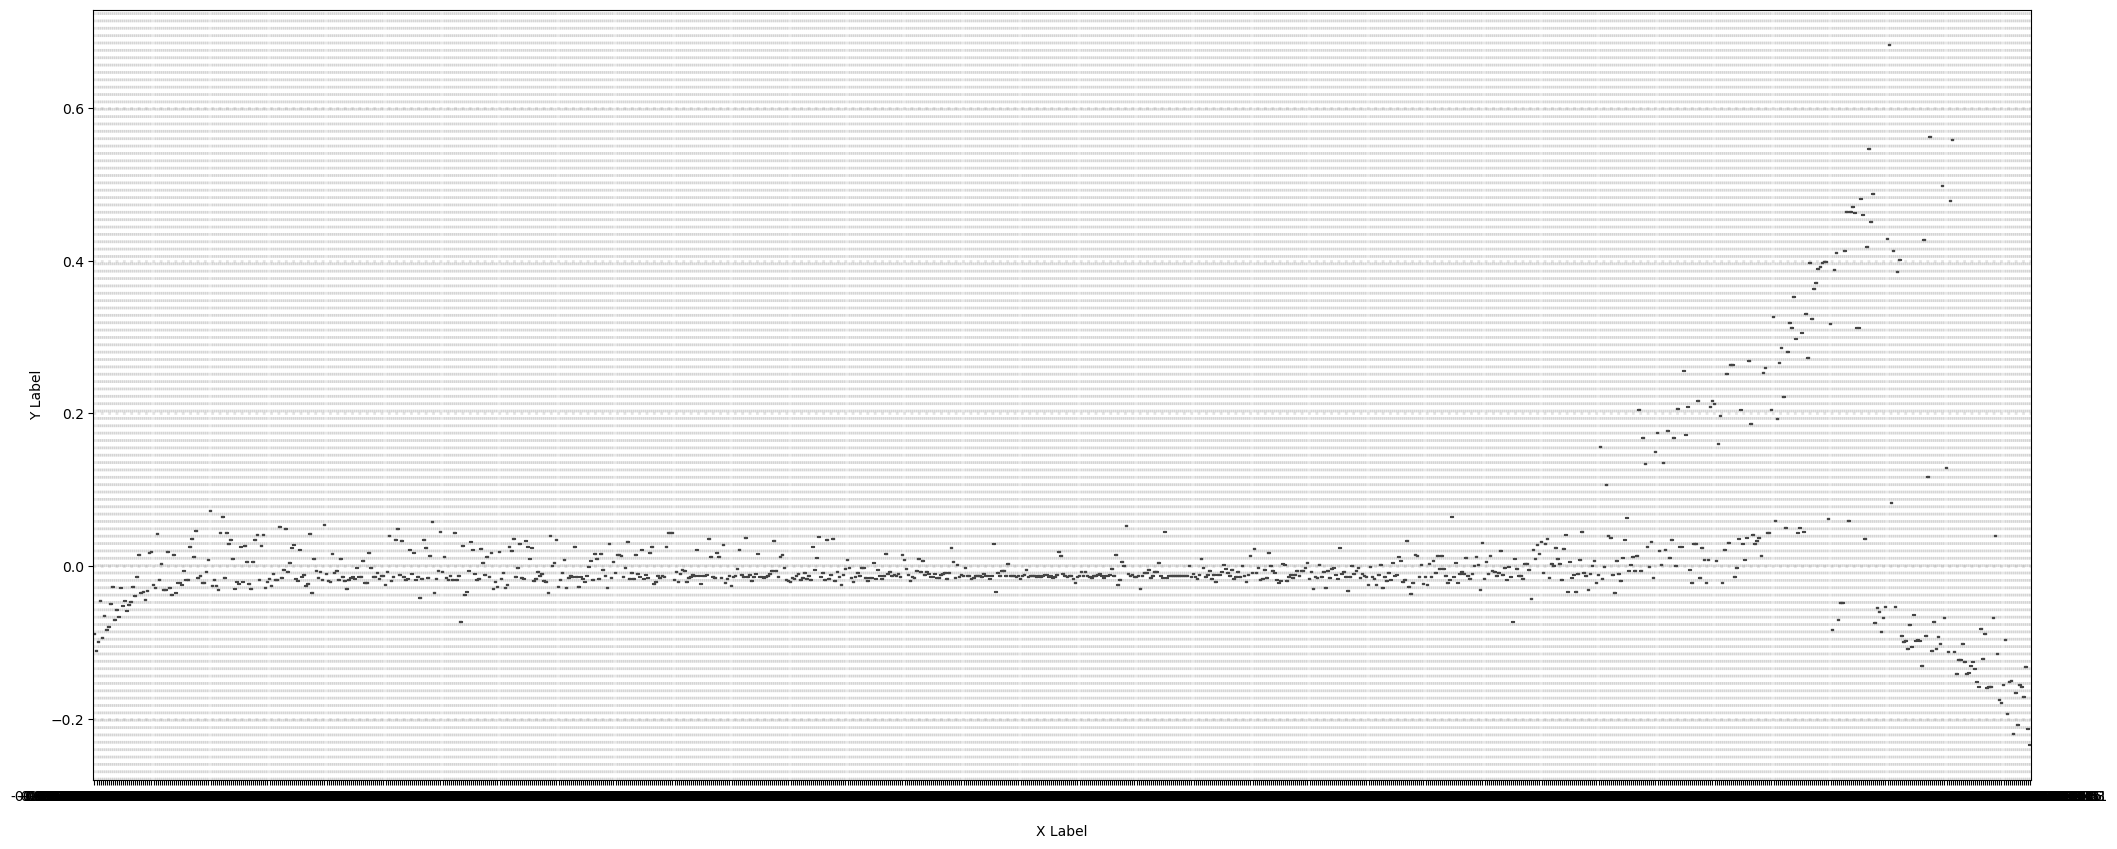

In [216]:
# plot
fig = plt.figure(figsize = (25,10))
array_list = []
for c, datasets in zip(col, dataset):
    xs = X_reduced[X['data_from'] == datasets].T[0]
    ys = X_reduced[X['data_from'] == datasets].T[1]
    array_list.append(zip(xs,ys))

dots = pd.DataFrame.from_records(array_list[0] , columns= ['x','y'])    
ax = sns.boxplot(x='x', y='y', data=dots)

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [217]:
print( X_reduced)

[[-0.03128189 -0.00994519]
 [ 0.30546219 -0.12124421]
 [ 0.09053892  0.38969953]
 ...
 [-0.02054191 -0.00189644]
 [-0.04794244 -0.02948346]
 [-0.03012682 -0.02456447]]


## Regplot 分布密度圖

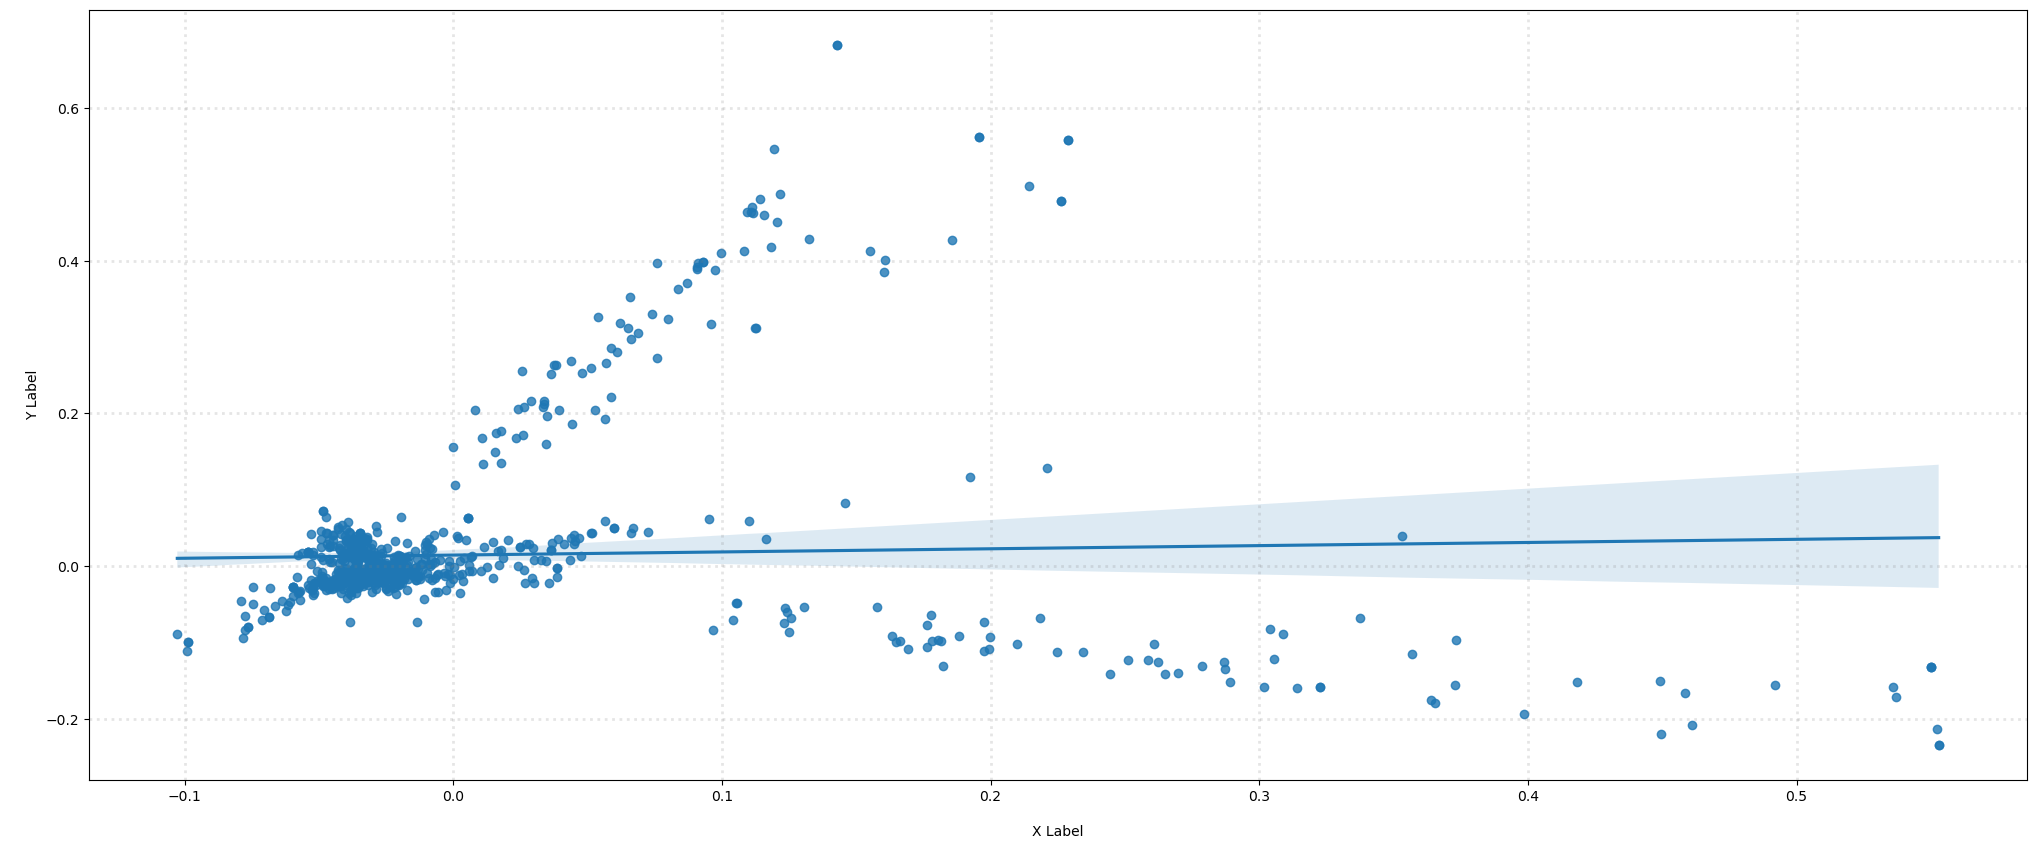

In [218]:
# plot
fig = plt.figure(figsize = (25,10))
array_list = []
for c, datasets in zip(col, dataset):
    xs = X_reduced[X['data_from'] == datasets].T[0]
    ys = X_reduced[X['data_from'] == datasets].T[1]
    array_list.append(zip(xs,ys))

dots = pd.DataFrame.from_records(array_list[0] , columns= ['x','y'])    
ax = sns.regplot(x='x', y='y', data=dots)

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

##  stem 棒棒糖圖

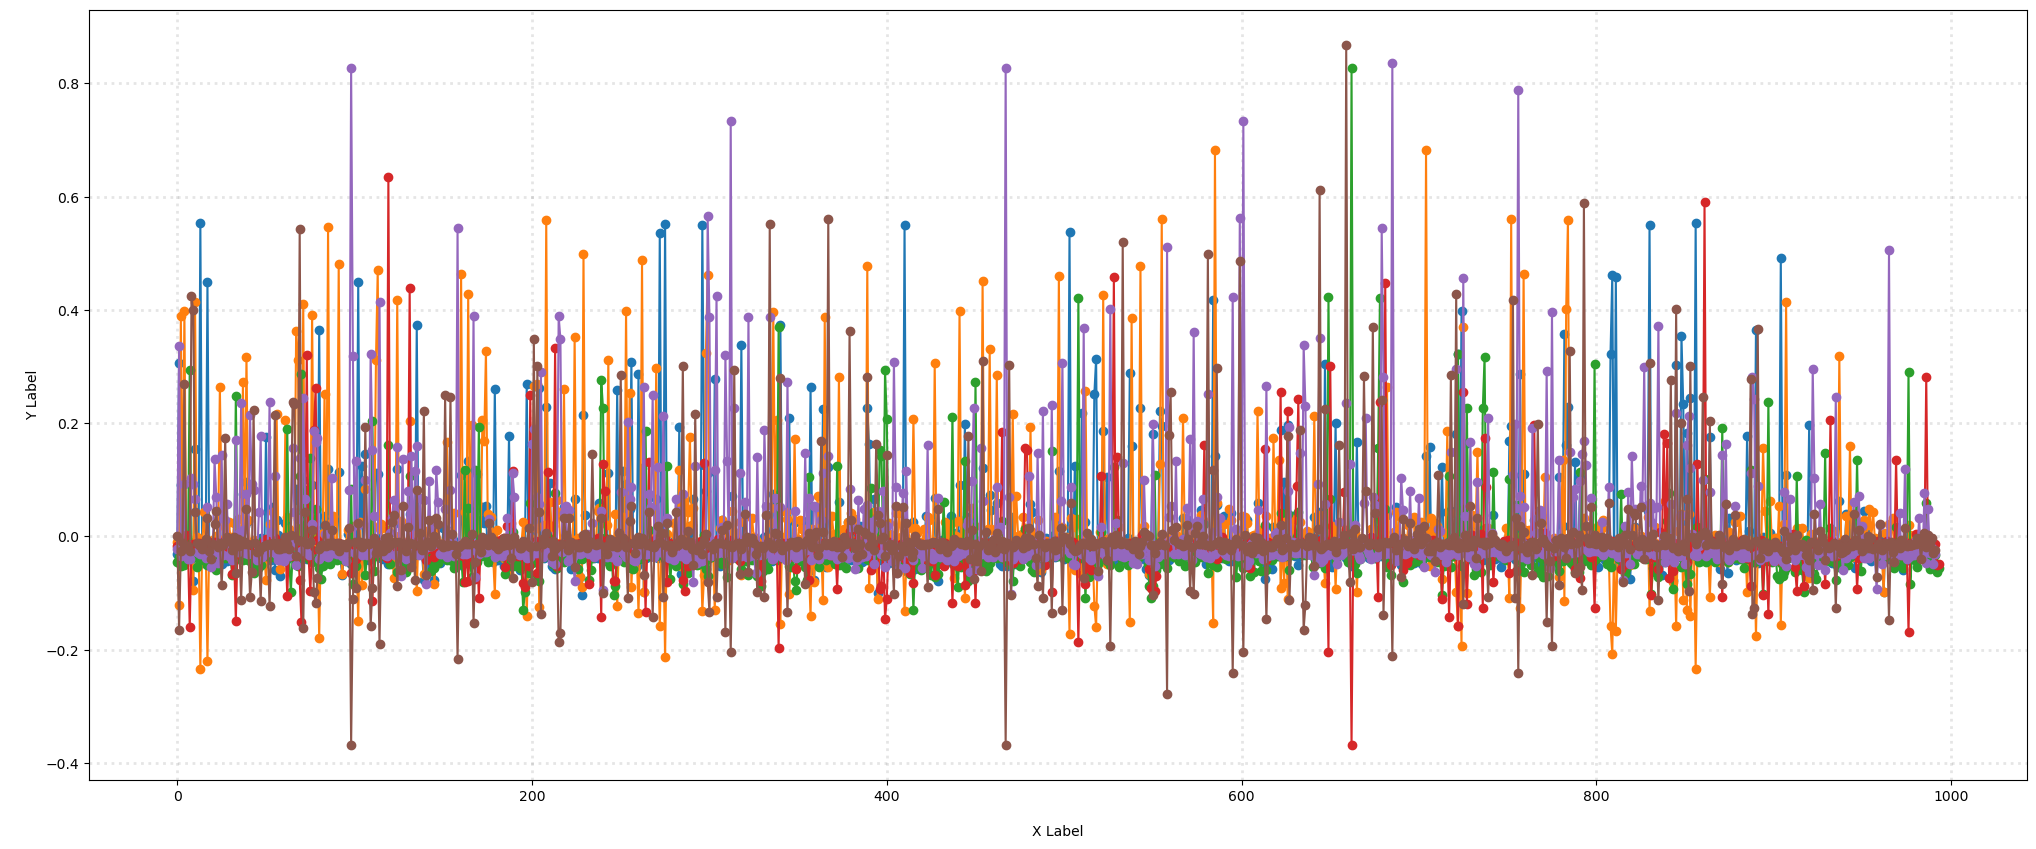

In [219]:
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, datasets in zip(col, dataset):
    xs = X_reduced[X['data_from'] == datasets].T[0]
    ys = X_reduced[X['data_from'] == datasets].T[1]
    plt.plot(list(zip(xs,ys)),linestyle='-', marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

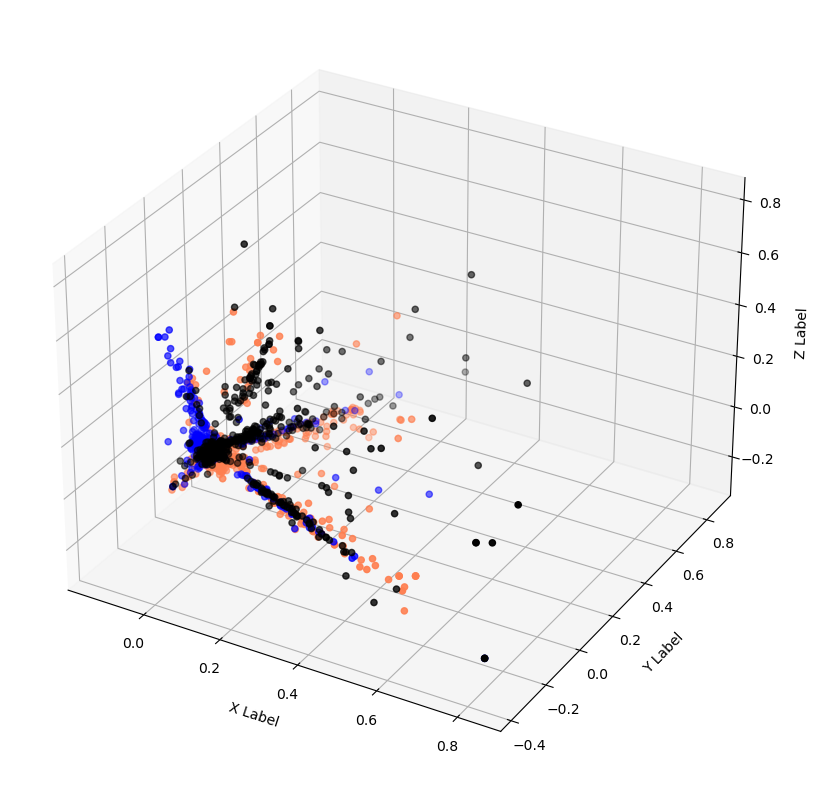

In [220]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_reduced.shape
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = plt.subplot( projection = '3d' )

for c, datasets in zip(col, dataset ):
    xs = X_reduced[X['data_from'] == datasets].T[0]
    ys = X_reduced[X['data_from'] == datasets].T[1]
    zs = X_reduced[X['data_from'] == datasets].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
plt.show()


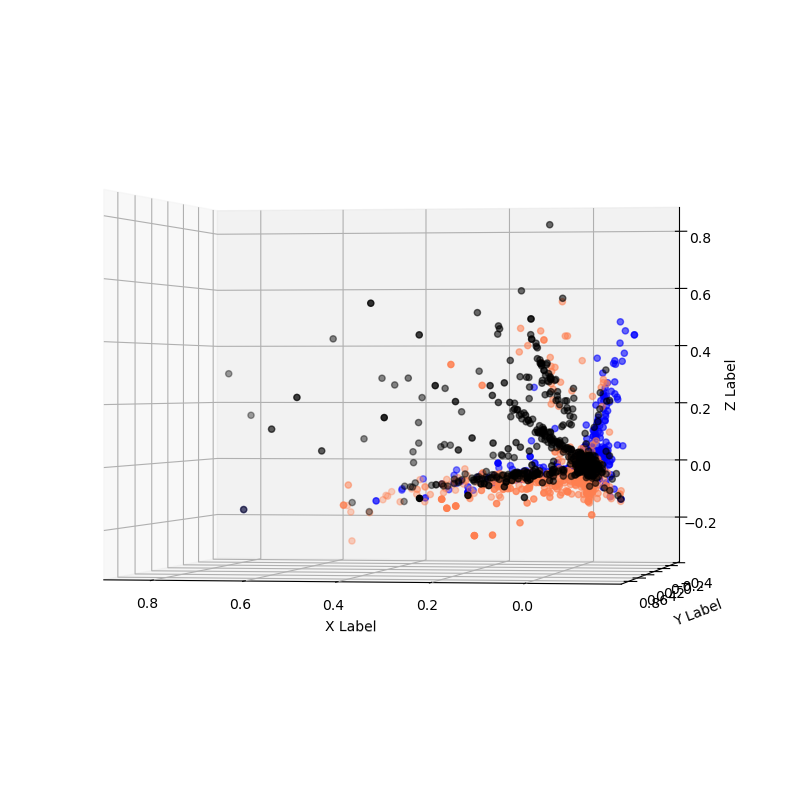

In [221]:
fig = plt.figure(figsize = (25,10))
ax = plt.subplot( projection = '3d' )

for c, datasets in zip(col, dataset ):
    xs = X_reduced[X['data_from'] == datasets].T[0]
    ys = X_reduced[X['data_from'] == datasets].T[1]
    zs = X_reduced[X['data_from'] == datasets].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(0,100)
plt.show()

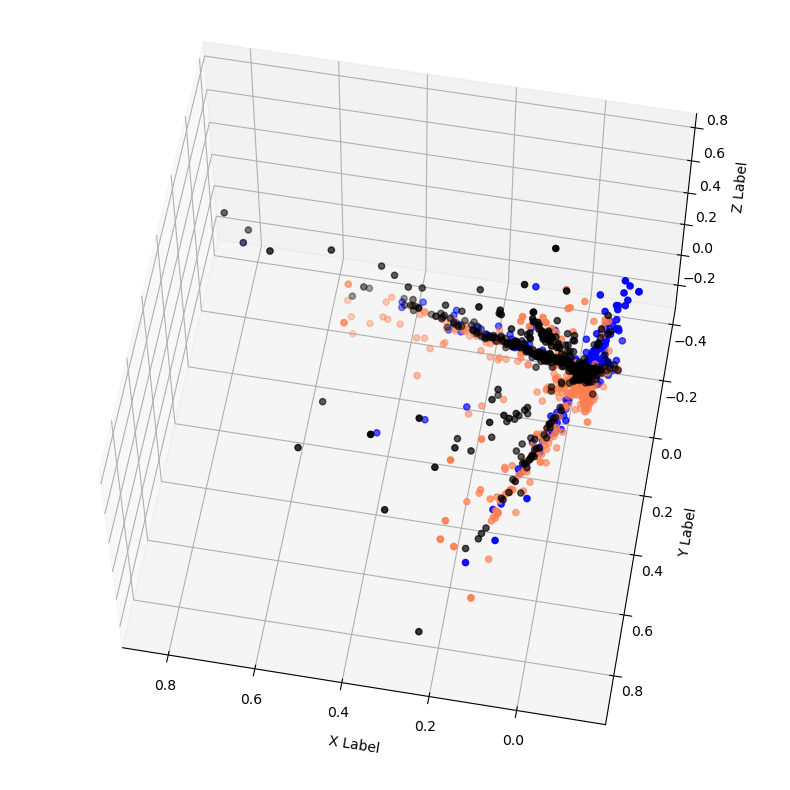

In [222]:

fig = plt.figure(figsize = (25,10))
ax = plt.subplot( projection = '3d' )

for c, datasets in zip(col, dataset ):
    xs = X_reduced[X['data_from'] == datasets].T[0]
    ys = X_reduced[X['data_from'] == datasets].T[1]
    zs = X_reduced[X['data_from'] == datasets].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(60,100)
plt.show()

### 5.5 Attribute Transformation / Aggregation
We can do other things with the term-vector matrix besides applying dimensionality reduction technique to deal with sparsity problem. Here we are going to generate a simple distribution of the words found in all the entire set of articles. Intuitively, this may not make any sense, but in data science sometimes we take some things for granted, and we just have to explore the data first before making any premature conclusions. On the topic of attribute transformation, we will take the word distribution and put the distribution in a scale that makes it easy to analyze patterns in the distrubution of words. Let us get into it!

In [223]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for

term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0] #sum of first term

0.39703260750665115

In [224]:
# find the token frequencies exceed 100 times
# use pandas to bind token and num of frequencies together
array = pd.DataFrame({ 'x':vectorizer.get_feature_names_out(),
                       'y':term_frequencies
                     })
filt = ( array['y'] > 20 )
array = array.loc[filt]
print(array)
px.bar(array['y'], x=array['x'][:300], y=array['y'][:300])

              x          y
343         bad  36.571663
425        best  25.071566
1291        don  26.685467
1525  excellent  21.152329
1660       film  40.025012
1736       food  39.617759
1895       good  67.823303
1925      great  61.830948
2373       just  33.994438
2513       like  31.270597
2585       love  22.777302
2819      movie  46.306041
3151      phone  45.159471
3180      place  36.022346
3320    product  23.056971
3395    quality  23.812617
3451     really  32.028028
3473  recommend  22.811374
3813    service  41.478864
4371       time  32.927729
4840      works  20.502986


In [225]:
import plotly.express as px
px.bar(term_frequencies, x=vectorizer.get_feature_names_out()[:300], y=term_frequencies[:300])


In [226]:
array = pd.DataFrame({ 'x':vectorizer.get_feature_names_out(),
                       'y':term_frequencies
                     })
array.sort_values( by=['y'],ascending=False,inplace=True)
px.bar(array['y'], x=array['x'][:300], y=array['y'][:300])

In [227]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

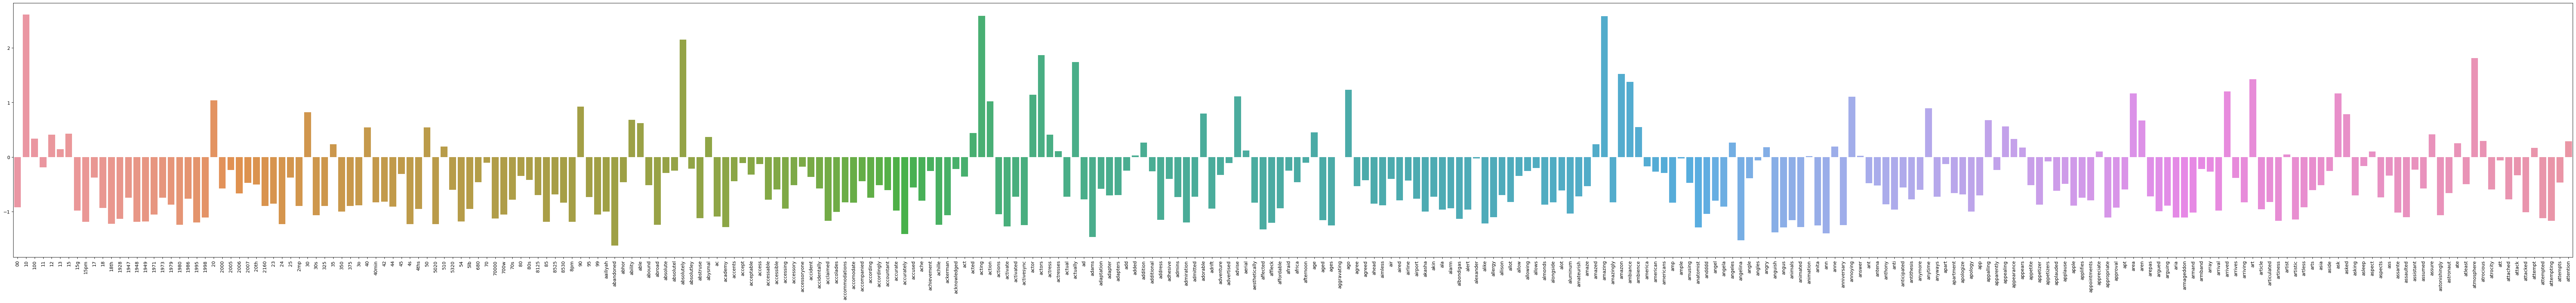

In [228]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=vectorizer.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(vectorizer.get_feature_names_out()[:300], rotation = 90);

## Naive Bayes classifier

In [252]:
print(X_freqency['text']) #the array after the tf-idf
#X # the data array in the beginning

text
So there is no way for me to plug it in here in the US unless I go by a converter.                                                        0.0
Good case, Excellent value.                                                                                                               0.0
Great for the jawbone.                                                                                                                    0.0
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!                                                           0.0
The mic is great.                                                                                                                         0.0
                                                                                                                                         ... 
I think food should have flavor and texture and both were lacking.                                                                        0.0
A

In [241]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X_freqency, X['category'], test_size=0.5, random_state=0)
print(X_train['text'])
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print( y_test )
print( y_pred )
print( "current to guess: %d" % (y_test == y_pred).sum() )
print( "wrong to guess: %d" % (y_test != y_pred).sum() )
predict_result = pd.DataFrame( y_pred ,columns = ['predict'], index = X_test.text.tolist())
print(predict_result)
print(y_test)
predict_result['result'] = y_test.tolist()
wrong_data = ( predict_result['predict'] != predict_result['result'] )
wrong_predict_result = predict_result.loc[wrong_data]
print(wrong_predict_result)


text
good item, low price.                                                                                                                       0.0
None of the three sizes they sent with the headset would stay in my ears.                                                                   0.0
I immediately said I wanted to talk to the manager but I did not want to talk to the guy who was doing shots of fireball behind the bar.    0.0
I think food should have flavor and texture and both were lacking.                                                                          0.0
Not impressed.                                                                                                                              0.0
                                                                                                                                           ... 
I am sorry I made this purchase.                                                                                                   